# This notebook is dedicated to Machine Learning
***
Now with the cleaned dataset, we want to create a model that can be able to predict global sales of new upcoming games

In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
from catboost import Pool, CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf

from tensorflow_addons.metrics import RSquare

We will first shuffle and split the data into 2 parts; training data and testing data. we can't do a 50/50 split because we want to ensure that we have more training data when training our model so that the model doesn't overfit. At the same time we do not want our test data to be too small, having a low amount of test data would not reflect well on the model's overall performance (law of large numbers). For this reason, we will be spliting our data into 80% train and 20% test.

In [58]:
data = pd.read_csv('ml_dataSet.csv')
data.head()

# Split train and test
print("The data is {}.".format(data.shape))

data_shuffle = data.sample(frac=1)
train = data_shuffle[:int(0.8 * len(data_shuffle))]
test = data_shuffle[int(0.8 * len(data_shuffle)):]

print("The training data is {}.".format(train.shape))
print("The test data is {}.".format(test.shape))

The data is (5576, 11).
The training data is (4460, 11).
The test data is (1116, 11).


The variables that we decided to use to predict global sales are 'Name','Platform', 'Year', 'Genre', 'Publisher' and 'meta_score'.

In [59]:
CATEGORICAL = ['Name','Platform', 'Year', 'Genre', 'Publisher','meta_score']
X_train = train[CATEGORICAL]
y_train = train['Global_Sales']
X_test = test[CATEGORICAL]
y_test = test['Global_Sales']

print("X_train is of shape {}.".format(X_train.shape))
print("y_train is of shape {}.".format(y_train.shape))
print("X_test is of shape {}.".format(X_test.shape))
print("y_test is of shape {}.".format(y_test.shape))

X_train is of shape (4460, 6).
y_train is of shape (4460,).
X_test is of shape (1116, 6).
y_test is of shape (1116,).


<br>For the first model, we will be using Catboost. CatBoost is a relatively new open-source machine learning algorithm, developed in 2017 by a company named Yandex. One of CatBoost’s core edges is its ability to integrate a variety of different data types, such as images, audio, or text features into one framework. Catboost makes it easy to handle categorical data, opposed to the majority of other machine learning algorithms, that cannot handle non-numeric values. From a feature engineering perspective, the transformation from a non-numeric state to numeric values can be a very non-trivial and tedious task, and CatBoost makes this step obsolete.

CatBoost builds upon the theory of decision trees and gradient boosting. The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) and thus through greedy search create a strong competitive predictive model.

To include categorical variables in the training, we just have to list the columns of the data that are categorical. In this case, they are 0,1,3,4 which corresponds to 'Name','Platform','Genre' and 'Publisher' respectively. 

In [65]:
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=[0,1,3,4])
test_pool = Pool(X_test, 
                 cat_features=[0,1,3,4])

model = CatBoostRegressor(iterations=10000,learning_rate=0.001,loss_function='RMSE')
model.fit(train_pool)

0:	learn: 283590.6934318	total: 39.7ms	remaining: 6m 36s
1:	learn: 283529.7859253	total: 112ms	remaining: 9m 18s
2:	learn: 283466.3545054	total: 151ms	remaining: 8m 24s
3:	learn: 283404.1135420	total: 190ms	remaining: 7m 53s
4:	learn: 283343.8027776	total: 237ms	remaining: 7m 54s
5:	learn: 283278.1769781	total: 316ms	remaining: 8m 46s
6:	learn: 283218.0795568	total: 356ms	remaining: 8m 27s
7:	learn: 283156.9012013	total: 402ms	remaining: 8m 21s
8:	learn: 283092.8799534	total: 431ms	remaining: 7m 58s
9:	learn: 283030.3176868	total: 459ms	remaining: 7m 38s
10:	learn: 282968.6797681	total: 537ms	remaining: 8m 7s
11:	learn: 282904.4150066	total: 589ms	remaining: 8m 9s
12:	learn: 282840.5773654	total: 630ms	remaining: 8m 4s
13:	learn: 282776.9383911	total: 729ms	remaining: 8m 40s
14:	learn: 282712.2509922	total: 807ms	remaining: 8m 57s
15:	learn: 282647.7000414	total: 848ms	remaining: 8m 49s
16:	learn: 282585.6244319	total: 877ms	remaining: 8m 34s
17:	learn: 282521.1106063	total: 913ms	rema

145:	learn: 275348.2514786	total: 8.34s	remaining: 9m 22s
146:	learn: 275295.2305614	total: 8.42s	remaining: 9m 24s
147:	learn: 275240.5150261	total: 8.46s	remaining: 9m 23s
148:	learn: 275190.1245694	total: 8.51s	remaining: 9m 22s
149:	learn: 275136.4191769	total: 8.58s	remaining: 9m 23s
150:	learn: 275083.8438910	total: 8.63s	remaining: 9m 23s
151:	learn: 275029.2250660	total: 8.7s	remaining: 9m 23s
152:	learn: 274978.9813119	total: 8.75s	remaining: 9m 22s
153:	learn: 274927.2312425	total: 8.81s	remaining: 9m 23s
154:	learn: 274876.3359790	total: 8.88s	remaining: 9m 23s
155:	learn: 274830.5104149	total: 8.94s	remaining: 9m 24s
156:	learn: 274780.4310522	total: 8.97s	remaining: 9m 22s
157:	learn: 274725.6885919	total: 9.01s	remaining: 9m 21s
158:	learn: 274674.1446719	total: 9.05s	remaining: 9m 20s
159:	learn: 274624.1289725	total: 9.1s	remaining: 9m 19s
160:	learn: 274572.7857740	total: 9.17s	remaining: 9m 20s
161:	learn: 274518.7706057	total: 9.21s	remaining: 9m 19s
162:	learn: 2744

288:	learn: 268581.4645722	total: 15s	remaining: 8m 24s
289:	learn: 268536.7845871	total: 15.1s	remaining: 8m 25s
290:	learn: 268496.5559000	total: 15.1s	remaining: 8m 24s
291:	learn: 268454.4679041	total: 15.2s	remaining: 8m 24s
292:	learn: 268415.7178236	total: 15.2s	remaining: 8m 23s
293:	learn: 268372.0617114	total: 15.3s	remaining: 8m 23s
294:	learn: 268329.2319999	total: 15.3s	remaining: 8m 23s
295:	learn: 268283.9444293	total: 15.4s	remaining: 8m 23s
296:	learn: 268245.6055473	total: 15.4s	remaining: 8m 23s
297:	learn: 268204.6841872	total: 15.5s	remaining: 8m 23s
298:	learn: 268166.4499936	total: 15.5s	remaining: 8m 23s
299:	learn: 268125.5832502	total: 15.6s	remaining: 8m 23s
300:	learn: 268083.3840215	total: 15.6s	remaining: 8m 22s
301:	learn: 268043.2294655	total: 15.6s	remaining: 8m 22s
302:	learn: 267996.9359069	total: 15.7s	remaining: 8m 22s
303:	learn: 267959.1162536	total: 15.7s	remaining: 8m 21s
304:	learn: 267915.0780386	total: 15.8s	remaining: 8m 21s
305:	learn: 2678

430:	learn: 263097.8867120	total: 22.2s	remaining: 8m 11s
431:	learn: 263061.8774964	total: 22.2s	remaining: 8m 11s
432:	learn: 263027.1077921	total: 22.2s	remaining: 8m 10s
433:	learn: 262993.3578235	total: 22.3s	remaining: 8m 11s
434:	learn: 262961.3288036	total: 22.3s	remaining: 8m 10s
435:	learn: 262929.0782397	total: 22.4s	remaining: 8m 10s
436:	learn: 262896.0975766	total: 22.4s	remaining: 8m 10s
437:	learn: 262860.5168463	total: 22.5s	remaining: 8m 10s
438:	learn: 262825.5435885	total: 22.5s	remaining: 8m 10s
439:	learn: 262791.9044832	total: 22.6s	remaining: 8m 10s
440:	learn: 262758.1872463	total: 22.6s	remaining: 8m 10s
441:	learn: 262721.3365445	total: 22.7s	remaining: 8m 10s
442:	learn: 262684.0433011	total: 22.7s	remaining: 8m 10s
443:	learn: 262647.4453991	total: 22.9s	remaining: 8m 11s
444:	learn: 262613.3962839	total: 22.9s	remaining: 8m 12s
445:	learn: 262580.2844314	total: 23s	remaining: 8m 12s
446:	learn: 262546.0450103	total: 23s	remaining: 8m 12s
447:	learn: 262509

575:	learn: 258413.1538041	total: 30.1s	remaining: 8m 11s
576:	learn: 258379.3015265	total: 30.1s	remaining: 8m 11s
577:	learn: 258348.3953844	total: 30.2s	remaining: 8m 12s
578:	learn: 258315.0402903	total: 30.2s	remaining: 8m 11s
579:	learn: 258285.3990482	total: 30.3s	remaining: 8m 11s
580:	learn: 258254.3819185	total: 30.4s	remaining: 8m 12s
581:	learn: 258224.1667839	total: 30.5s	remaining: 8m 12s
582:	learn: 258194.9112771	total: 30.5s	remaining: 8m 13s
583:	learn: 258161.7137589	total: 30.6s	remaining: 8m 13s
584:	learn: 258131.1445385	total: 30.6s	remaining: 8m 13s
585:	learn: 258100.0496280	total: 30.7s	remaining: 8m 12s
586:	learn: 258068.5150217	total: 30.7s	remaining: 8m 12s
587:	learn: 258041.2354646	total: 30.7s	remaining: 8m 12s
588:	learn: 258015.7293156	total: 30.8s	remaining: 8m 11s
589:	learn: 257985.4102021	total: 30.9s	remaining: 8m 12s
590:	learn: 257954.0909315	total: 31s	remaining: 8m 12s
591:	learn: 257923.3735239	total: 31s	remaining: 8m 12s
592:	learn: 257893

719:	learn: 254520.3899071	total: 37.1s	remaining: 7m 58s
720:	learn: 254493.9030714	total: 37.1s	remaining: 7m 57s
721:	learn: 254465.5663624	total: 37.2s	remaining: 7m 57s
722:	learn: 254441.7913348	total: 37.2s	remaining: 7m 57s
723:	learn: 254418.5441549	total: 37.3s	remaining: 7m 57s
724:	learn: 254392.7388128	total: 37.3s	remaining: 7m 57s
725:	learn: 254369.0560572	total: 37.4s	remaining: 7m 57s
726:	learn: 254343.2134021	total: 37.4s	remaining: 7m 57s
727:	learn: 254320.9107566	total: 37.4s	remaining: 7m 56s
728:	learn: 254296.1563806	total: 37.5s	remaining: 7m 56s
729:	learn: 254272.0915245	total: 37.5s	remaining: 7m 56s
730:	learn: 254251.3864370	total: 37.5s	remaining: 7m 55s
731:	learn: 254225.1976616	total: 37.6s	remaining: 7m 55s
732:	learn: 254198.6795219	total: 37.6s	remaining: 7m 55s
733:	learn: 254174.8087467	total: 37.7s	remaining: 7m 55s
734:	learn: 254152.2934698	total: 37.7s	remaining: 7m 55s
735:	learn: 254132.0042152	total: 37.8s	remaining: 7m 55s
736:	learn: 25

864:	learn: 251332.2802292	total: 45.1s	remaining: 7m 56s
865:	learn: 251317.3019039	total: 45.1s	remaining: 7m 55s
866:	learn: 251295.0192563	total: 45.2s	remaining: 7m 55s
867:	learn: 251274.3010789	total: 45.3s	remaining: 7m 56s
868:	learn: 251252.1595928	total: 45.3s	remaining: 7m 56s
869:	learn: 251230.3551096	total: 45.4s	remaining: 7m 56s
870:	learn: 251206.9225521	total: 45.4s	remaining: 7m 56s
871:	learn: 251187.2190968	total: 45.5s	remaining: 7m 56s
872:	learn: 251167.9876652	total: 45.5s	remaining: 7m 55s
873:	learn: 251145.9920434	total: 45.6s	remaining: 7m 56s
874:	learn: 251125.5475276	total: 45.6s	remaining: 7m 56s
875:	learn: 251105.3376281	total: 45.7s	remaining: 7m 55s
876:	learn: 251089.0985927	total: 45.7s	remaining: 7m 55s
877:	learn: 251068.1797146	total: 45.8s	remaining: 7m 55s
878:	learn: 251047.2952310	total: 45.8s	remaining: 7m 55s
879:	learn: 251025.2498265	total: 45.9s	remaining: 7m 55s
880:	learn: 251007.3527299	total: 45.9s	remaining: 7m 55s
881:	learn: 25

1009:	learn: 248588.8371999	total: 53.9s	remaining: 7m 59s
1010:	learn: 248570.8182704	total: 53.9s	remaining: 7m 59s
1011:	learn: 248553.1224247	total: 54s	remaining: 7m 59s
1012:	learn: 248536.0366014	total: 54s	remaining: 7m 59s
1013:	learn: 248516.7024009	total: 54.1s	remaining: 7m 59s
1014:	learn: 248498.5138676	total: 54.1s	remaining: 7m 59s
1015:	learn: 248482.9713055	total: 54.2s	remaining: 7m 59s
1016:	learn: 248466.2351490	total: 54.3s	remaining: 7m 59s
1017:	learn: 248451.6106129	total: 54.3s	remaining: 7m 59s
1018:	learn: 248435.3971470	total: 54.4s	remaining: 7m 59s
1019:	learn: 248418.9742422	total: 54.4s	remaining: 7m 59s
1020:	learn: 248402.4322040	total: 54.5s	remaining: 7m 59s
1021:	learn: 248383.8076932	total: 54.5s	remaining: 7m 59s
1022:	learn: 248366.4886272	total: 54.6s	remaining: 7m 58s
1023:	learn: 248349.2698806	total: 54.7s	remaining: 7m 59s
1024:	learn: 248330.8638122	total: 54.7s	remaining: 7m 58s
1025:	learn: 248315.7288223	total: 54.7s	remaining: 7m 58s
1

1151:	learn: 246353.7043302	total: 1m 3s	remaining: 8m 8s
1152:	learn: 246338.9154022	total: 1m 3s	remaining: 8m 8s
1153:	learn: 246323.7362907	total: 1m 3s	remaining: 8m 8s
1154:	learn: 246306.1871060	total: 1m 3s	remaining: 8m 8s
1155:	learn: 246291.6808751	total: 1m 3s	remaining: 8m 9s
1156:	learn: 246276.1689012	total: 1m 4s	remaining: 8m 9s
1157:	learn: 246263.9918104	total: 1m 4s	remaining: 8m 9s
1158:	learn: 246247.8861391	total: 1m 4s	remaining: 8m 9s
1159:	learn: 246233.2682384	total: 1m 4s	remaining: 8m 9s
1160:	learn: 246215.4976541	total: 1m 4s	remaining: 8m 9s
1161:	learn: 246203.2796194	total: 1m 4s	remaining: 8m 9s
1162:	learn: 246193.1216393	total: 1m 4s	remaining: 8m 9s
1163:	learn: 246179.2966800	total: 1m 4s	remaining: 8m 9s
1164:	learn: 246164.1136173	total: 1m 4s	remaining: 8m 9s
1165:	learn: 246149.6505332	total: 1m 4s	remaining: 8m 9s
1166:	learn: 246132.8828224	total: 1m 4s	remaining: 8m 9s
1167:	learn: 246127.5721234	total: 1m 4s	remaining: 8m 9s
1168:	learn: 2

1292:	learn: 244405.2592749	total: 1m 13s	remaining: 8m 13s
1293:	learn: 244390.1693632	total: 1m 13s	remaining: 8m 12s
1294:	learn: 244377.6405718	total: 1m 13s	remaining: 8m 13s
1295:	learn: 244363.3519205	total: 1m 13s	remaining: 8m 12s
1296:	learn: 244349.9953884	total: 1m 13s	remaining: 8m 12s
1297:	learn: 244341.9601836	total: 1m 13s	remaining: 8m 13s
1298:	learn: 244333.4196261	total: 1m 13s	remaining: 8m 13s
1299:	learn: 244320.5794286	total: 1m 13s	remaining: 8m 13s
1300:	learn: 244307.3226532	total: 1m 13s	remaining: 8m 13s
1301:	learn: 244294.1134605	total: 1m 13s	remaining: 8m 13s
1302:	learn: 244282.9826556	total: 1m 13s	remaining: 8m 13s
1303:	learn: 244270.5291251	total: 1m 13s	remaining: 8m 13s
1304:	learn: 244253.9329542	total: 1m 14s	remaining: 8m 13s
1305:	learn: 244241.2385523	total: 1m 14s	remaining: 8m 13s
1306:	learn: 244232.6420566	total: 1m 14s	remaining: 8m 13s
1307:	learn: 244221.2512349	total: 1m 14s	remaining: 8m 13s
1308:	learn: 244209.4775418	total: 1m 14

1430:	learn: 242735.1647467	total: 1m 23s	remaining: 8m 18s
1431:	learn: 242724.7393586	total: 1m 23s	remaining: 8m 18s
1432:	learn: 242715.3575470	total: 1m 23s	remaining: 8m 18s
1433:	learn: 242704.2442215	total: 1m 23s	remaining: 8m 17s
1434:	learn: 242694.5749532	total: 1m 23s	remaining: 8m 17s
1435:	learn: 242683.8558588	total: 1m 23s	remaining: 8m 18s
1436:	learn: 242672.2313528	total: 1m 23s	remaining: 8m 18s
1437:	learn: 242659.6164420	total: 1m 23s	remaining: 8m 18s
1438:	learn: 242648.7985582	total: 1m 23s	remaining: 8m 18s
1439:	learn: 242635.2726914	total: 1m 23s	remaining: 8m 18s
1440:	learn: 242622.9137965	total: 1m 23s	remaining: 8m 18s
1441:	learn: 242610.9298966	total: 1m 23s	remaining: 8m 17s
1442:	learn: 242598.1871104	total: 1m 23s	remaining: 8m 17s
1443:	learn: 242587.6134688	total: 1m 24s	remaining: 8m 17s
1444:	learn: 242577.0708506	total: 1m 24s	remaining: 8m 17s
1445:	learn: 242565.0685494	total: 1m 24s	remaining: 8m 17s
1446:	learn: 242553.1376232	total: 1m 24

1567:	learn: 241242.4714401	total: 1m 33s	remaining: 8m 21s
1568:	learn: 241230.5025125	total: 1m 33s	remaining: 8m 21s
1569:	learn: 241221.3075704	total: 1m 33s	remaining: 8m 21s
1570:	learn: 241212.0141501	total: 1m 33s	remaining: 8m 21s
1571:	learn: 241202.0994817	total: 1m 33s	remaining: 8m 21s
1572:	learn: 241195.1664111	total: 1m 33s	remaining: 8m 21s
1573:	learn: 241183.7778466	total: 1m 33s	remaining: 8m 21s
1574:	learn: 241172.3997981	total: 1m 33s	remaining: 8m 21s
1575:	learn: 241165.0300509	total: 1m 33s	remaining: 8m 21s
1576:	learn: 241154.6144697	total: 1m 33s	remaining: 8m 21s
1577:	learn: 241143.6696951	total: 1m 34s	remaining: 8m 21s
1578:	learn: 241133.5383777	total: 1m 34s	remaining: 8m 21s
1579:	learn: 241121.0421088	total: 1m 34s	remaining: 8m 21s
1580:	learn: 241111.8201596	total: 1m 34s	remaining: 8m 21s
1581:	learn: 241102.3727856	total: 1m 34s	remaining: 8m 21s
1582:	learn: 241092.3182781	total: 1m 34s	remaining: 8m 22s
1583:	learn: 241083.6247141	total: 1m 34

1704:	learn: 239935.4437346	total: 1m 43s	remaining: 8m 23s
1705:	learn: 239926.3462411	total: 1m 43s	remaining: 8m 23s
1706:	learn: 239918.1049251	total: 1m 43s	remaining: 8m 23s
1707:	learn: 239904.7557332	total: 1m 43s	remaining: 8m 23s
1708:	learn: 239894.1537882	total: 1m 43s	remaining: 8m 23s
1709:	learn: 239886.3158554	total: 1m 43s	remaining: 8m 23s
1710:	learn: 239879.1417153	total: 1m 44s	remaining: 8m 23s
1711:	learn: 239871.5277972	total: 1m 44s	remaining: 8m 23s
1712:	learn: 239862.2216469	total: 1m 44s	remaining: 8m 23s
1713:	learn: 239852.9335503	total: 1m 44s	remaining: 8m 24s
1714:	learn: 239841.8357629	total: 1m 44s	remaining: 8m 23s
1715:	learn: 239832.6659097	total: 1m 44s	remaining: 8m 23s
1716:	learn: 239821.3861715	total: 1m 44s	remaining: 8m 23s
1717:	learn: 239813.6467815	total: 1m 44s	remaining: 8m 23s
1718:	learn: 239803.8244361	total: 1m 44s	remaining: 8m 23s
1719:	learn: 239796.2428900	total: 1m 44s	remaining: 8m 23s
1720:	learn: 239789.9882849	total: 1m 44

1843:	learn: 238732.9826353	total: 1m 53s	remaining: 8m 23s
1844:	learn: 238724.2006164	total: 1m 53s	remaining: 8m 23s
1845:	learn: 238714.8237346	total: 1m 54s	remaining: 8m 23s
1846:	learn: 238703.5715175	total: 1m 54s	remaining: 8m 23s
1847:	learn: 238694.2501700	total: 1m 54s	remaining: 8m 23s
1848:	learn: 238685.9375669	total: 1m 54s	remaining: 8m 24s
1849:	learn: 238679.0342258	total: 1m 54s	remaining: 8m 24s
1850:	learn: 238671.5626913	total: 1m 54s	remaining: 8m 24s
1851:	learn: 238662.8048949	total: 1m 54s	remaining: 8m 24s
1852:	learn: 238653.4824535	total: 1m 54s	remaining: 8m 24s
1853:	learn: 238645.1172322	total: 1m 54s	remaining: 8m 24s
1854:	learn: 238637.6431504	total: 1m 54s	remaining: 8m 24s
1855:	learn: 238628.3337069	total: 1m 55s	remaining: 8m 24s
1856:	learn: 238618.6510625	total: 1m 55s	remaining: 8m 24s
1857:	learn: 238609.2325722	total: 1m 55s	remaining: 8m 24s
1858:	learn: 238602.2589325	total: 1m 55s	remaining: 8m 24s
1859:	learn: 238593.6726506	total: 1m 55

1985:	learn: 237612.5384281	total: 2m 4s	remaining: 8m 21s
1986:	learn: 237606.2731371	total: 2m 4s	remaining: 8m 21s
1987:	learn: 237597.6136031	total: 2m 4s	remaining: 8m 21s
1988:	learn: 237590.7942095	total: 2m 4s	remaining: 8m 21s
1989:	learn: 237586.4339093	total: 2m 4s	remaining: 8m 21s
1990:	learn: 237579.8768639	total: 2m 4s	remaining: 8m 21s
1991:	learn: 237570.6111522	total: 2m 4s	remaining: 8m 21s
1992:	learn: 237563.7526421	total: 2m 4s	remaining: 8m 20s
1993:	learn: 237557.4748259	total: 2m 4s	remaining: 8m 20s
1994:	learn: 237549.8976475	total: 2m 4s	remaining: 8m 20s
1995:	learn: 237543.9984708	total: 2m 4s	remaining: 8m 20s
1996:	learn: 237537.5173618	total: 2m 4s	remaining: 8m 20s
1997:	learn: 237528.2254321	total: 2m 4s	remaining: 8m 20s
1998:	learn: 237518.2809648	total: 2m 5s	remaining: 8m 20s
1999:	learn: 237509.1752922	total: 2m 5s	remaining: 8m 20s
2000:	learn: 237502.6845909	total: 2m 5s	remaining: 8m 20s
2001:	learn: 237493.7281021	total: 2m 5s	remaining: 8m 2

2125:	learn: 236614.3052924	total: 2m 13s	remaining: 8m 15s
2126:	learn: 236606.0440467	total: 2m 13s	remaining: 8m 15s
2127:	learn: 236598.7088342	total: 2m 14s	remaining: 8m 15s
2128:	learn: 236591.2583854	total: 2m 14s	remaining: 8m 16s
2129:	learn: 236584.2813796	total: 2m 14s	remaining: 8m 16s
2130:	learn: 236576.8930936	total: 2m 14s	remaining: 8m 16s
2131:	learn: 236571.2564505	total: 2m 14s	remaining: 8m 16s
2132:	learn: 236564.1029237	total: 2m 14s	remaining: 8m 16s
2133:	learn: 236560.4861448	total: 2m 14s	remaining: 8m 15s
2134:	learn: 236552.9274730	total: 2m 14s	remaining: 8m 15s
2135:	learn: 236546.2344967	total: 2m 14s	remaining: 8m 15s
2136:	learn: 236539.9177429	total: 2m 14s	remaining: 8m 15s
2137:	learn: 236535.5753126	total: 2m 14s	remaining: 8m 15s
2138:	learn: 236530.7211453	total: 2m 14s	remaining: 8m 15s
2139:	learn: 236522.9414196	total: 2m 14s	remaining: 8m 15s
2140:	learn: 236517.2266784	total: 2m 15s	remaining: 8m 16s
2141:	learn: 236511.6754732	total: 2m 15

2264:	learn: 235716.5772092	total: 2m 23s	remaining: 8m 11s
2265:	learn: 235709.0906643	total: 2m 23s	remaining: 8m 11s
2266:	learn: 235702.1029687	total: 2m 24s	remaining: 8m 11s
2267:	learn: 235695.5267995	total: 2m 24s	remaining: 8m 11s
2268:	learn: 235688.6064613	total: 2m 24s	remaining: 8m 11s
2269:	learn: 235682.4995188	total: 2m 24s	remaining: 8m 11s
2270:	learn: 235676.6278604	total: 2m 24s	remaining: 8m 10s
2271:	learn: 235669.3717483	total: 2m 24s	remaining: 8m 10s
2272:	learn: 235662.2771943	total: 2m 24s	remaining: 8m 10s
2273:	learn: 235656.4706778	total: 2m 24s	remaining: 8m 10s
2274:	learn: 235649.8057253	total: 2m 24s	remaining: 8m 10s
2275:	learn: 235643.8661128	total: 2m 24s	remaining: 8m 10s
2276:	learn: 235637.4258605	total: 2m 24s	remaining: 8m 10s
2277:	learn: 235631.3866488	total: 2m 24s	remaining: 8m 10s
2278:	learn: 235626.9239504	total: 2m 24s	remaining: 8m 10s
2279:	learn: 235623.8846899	total: 2m 24s	remaining: 8m 10s
2280:	learn: 235615.8866015	total: 2m 25

2404:	learn: 234862.2841703	total: 2m 34s	remaining: 8m 6s
2405:	learn: 234858.0822321	total: 2m 34s	remaining: 8m 6s
2406:	learn: 234853.3942338	total: 2m 34s	remaining: 8m 6s
2407:	learn: 234847.8186388	total: 2m 34s	remaining: 8m 6s
2408:	learn: 234842.1140482	total: 2m 34s	remaining: 8m 7s
2409:	learn: 234838.0606629	total: 2m 34s	remaining: 8m 6s
2410:	learn: 234833.2987279	total: 2m 34s	remaining: 8m 6s
2411:	learn: 234826.4601669	total: 2m 34s	remaining: 8m 6s
2412:	learn: 234822.2512036	total: 2m 34s	remaining: 8m 6s
2413:	learn: 234817.6813986	total: 2m 34s	remaining: 8m 6s
2414:	learn: 234812.8186859	total: 2m 34s	remaining: 8m 6s
2415:	learn: 234804.2437054	total: 2m 34s	remaining: 8m 6s
2416:	learn: 234800.5587155	total: 2m 35s	remaining: 8m 6s
2417:	learn: 234795.6298380	total: 2m 35s	remaining: 8m 6s
2418:	learn: 234789.8069127	total: 2m 35s	remaining: 8m 6s
2419:	learn: 234784.1257532	total: 2m 35s	remaining: 8m 6s
2420:	learn: 234773.6462860	total: 2m 35s	remaining: 8m 

2544:	learn: 234084.7797489	total: 2m 43s	remaining: 7m 58s
2545:	learn: 234080.6570346	total: 2m 43s	remaining: 7m 58s
2546:	learn: 234073.7734992	total: 2m 43s	remaining: 7m 58s
2547:	learn: 234068.1462516	total: 2m 43s	remaining: 7m 58s
2548:	learn: 234061.5360408	total: 2m 43s	remaining: 7m 58s
2549:	learn: 234057.0966355	total: 2m 43s	remaining: 7m 58s
2550:	learn: 234050.5639785	total: 2m 43s	remaining: 7m 58s
2551:	learn: 234044.7166034	total: 2m 43s	remaining: 7m 58s
2552:	learn: 234040.5031795	total: 2m 43s	remaining: 7m 58s
2553:	learn: 234038.0821341	total: 2m 44s	remaining: 7m 58s
2554:	learn: 234034.4929416	total: 2m 44s	remaining: 7m 58s
2555:	learn: 234029.3464233	total: 2m 44s	remaining: 7m 58s
2556:	learn: 234022.7949031	total: 2m 44s	remaining: 7m 58s
2557:	learn: 234017.5822164	total: 2m 44s	remaining: 7m 58s
2558:	learn: 234012.1575168	total: 2m 44s	remaining: 7m 57s
2559:	learn: 234007.9797510	total: 2m 44s	remaining: 7m 58s
2560:	learn: 234002.3639776	total: 2m 44

2682:	learn: 233401.0842474	total: 2m 53s	remaining: 7m 53s
2683:	learn: 233396.6782093	total: 2m 53s	remaining: 7m 53s
2684:	learn: 233392.9906494	total: 2m 53s	remaining: 7m 53s
2685:	learn: 233387.5268295	total: 2m 53s	remaining: 7m 53s
2686:	learn: 233383.8168033	total: 2m 53s	remaining: 7m 53s
2687:	learn: 233379.6439491	total: 2m 53s	remaining: 7m 53s
2688:	learn: 233375.2125585	total: 2m 53s	remaining: 7m 53s
2689:	learn: 233371.2882943	total: 2m 54s	remaining: 7m 53s
2690:	learn: 233366.0665898	total: 2m 54s	remaining: 7m 53s
2691:	learn: 233359.7379118	total: 2m 54s	remaining: 7m 53s
2692:	learn: 233355.7213843	total: 2m 54s	remaining: 7m 53s
2693:	learn: 233350.6687719	total: 2m 54s	remaining: 7m 53s
2694:	learn: 233346.3866401	total: 2m 54s	remaining: 7m 52s
2695:	learn: 233339.2247251	total: 2m 54s	remaining: 7m 52s
2696:	learn: 233335.2993755	total: 2m 54s	remaining: 7m 52s
2697:	learn: 233328.9090527	total: 2m 54s	remaining: 7m 52s
2698:	learn: 233323.7962365	total: 2m 54

2823:	learn: 232738.0265320	total: 3m 3s	remaining: 7m 47s
2824:	learn: 232735.0863773	total: 3m 3s	remaining: 7m 47s
2825:	learn: 232730.2147067	total: 3m 3s	remaining: 7m 47s
2826:	learn: 232724.6747173	total: 3m 4s	remaining: 7m 47s
2827:	learn: 232720.3357262	total: 3m 4s	remaining: 7m 46s
2828:	learn: 232715.5911457	total: 3m 4s	remaining: 7m 46s
2829:	learn: 232709.8075814	total: 3m 4s	remaining: 7m 46s
2830:	learn: 232702.5389492	total: 3m 4s	remaining: 7m 46s
2831:	learn: 232697.8160738	total: 3m 4s	remaining: 7m 46s
2832:	learn: 232693.7284335	total: 3m 4s	remaining: 7m 46s
2833:	learn: 232689.0626822	total: 3m 4s	remaining: 7m 46s
2834:	learn: 232685.2077206	total: 3m 4s	remaining: 7m 46s
2835:	learn: 232680.2263951	total: 3m 4s	remaining: 7m 46s
2836:	learn: 232677.0037984	total: 3m 4s	remaining: 7m 46s
2837:	learn: 232670.2195570	total: 3m 4s	remaining: 7m 46s
2838:	learn: 232666.3399977	total: 3m 4s	remaining: 7m 46s
2839:	learn: 232663.6391455	total: 3m 5s	remaining: 7m 4

2961:	learn: 232106.7117807	total: 3m 13s	remaining: 7m 39s
2962:	learn: 232102.2689681	total: 3m 13s	remaining: 7m 39s
2963:	learn: 232098.5049400	total: 3m 13s	remaining: 7m 39s
2964:	learn: 232093.8218016	total: 3m 13s	remaining: 7m 39s
2965:	learn: 232087.8660178	total: 3m 13s	remaining: 7m 39s
2966:	learn: 232083.7645352	total: 3m 13s	remaining: 7m 39s
2967:	learn: 232079.5471602	total: 3m 13s	remaining: 7m 39s
2968:	learn: 232077.3779355	total: 3m 13s	remaining: 7m 39s
2969:	learn: 232072.0412759	total: 3m 13s	remaining: 7m 39s
2970:	learn: 232068.5308350	total: 3m 14s	remaining: 7m 39s
2971:	learn: 232063.6464023	total: 3m 14s	remaining: 7m 38s
2972:	learn: 232060.6145167	total: 3m 14s	remaining: 7m 38s
2973:	learn: 232054.8935428	total: 3m 14s	remaining: 7m 38s
2974:	learn: 232050.4095298	total: 3m 14s	remaining: 7m 38s
2975:	learn: 232047.5948930	total: 3m 14s	remaining: 7m 38s
2976:	learn: 232042.3468537	total: 3m 14s	remaining: 7m 38s
2977:	learn: 232038.9476706	total: 3m 14

3100:	learn: 231520.4898166	total: 3m 23s	remaining: 7m 31s
3101:	learn: 231516.1672910	total: 3m 23s	remaining: 7m 31s
3102:	learn: 231512.2431774	total: 3m 23s	remaining: 7m 31s
3103:	learn: 231508.3822345	total: 3m 23s	remaining: 7m 31s
3104:	learn: 231503.9487192	total: 3m 23s	remaining: 7m 31s
3105:	learn: 231499.7421287	total: 3m 23s	remaining: 7m 31s
3106:	learn: 231496.6197058	total: 3m 23s	remaining: 7m 31s
3107:	learn: 231493.5208624	total: 3m 23s	remaining: 7m 31s
3108:	learn: 231489.4149493	total: 3m 23s	remaining: 7m 31s
3109:	learn: 231485.8212225	total: 3m 23s	remaining: 7m 31s
3110:	learn: 231480.8040124	total: 3m 23s	remaining: 7m 31s
3111:	learn: 231475.8618879	total: 3m 23s	remaining: 7m 31s
3112:	learn: 231472.4816173	total: 3m 23s	remaining: 7m 31s
3113:	learn: 231469.8574611	total: 3m 24s	remaining: 7m 31s
3114:	learn: 231464.9119533	total: 3m 24s	remaining: 7m 31s
3115:	learn: 231464.5440613	total: 3m 24s	remaining: 7m 30s
3116:	learn: 231460.5013341	total: 3m 24

3238:	learn: 230988.9475397	total: 3m 33s	remaining: 7m 24s
3239:	learn: 230984.1673886	total: 3m 33s	remaining: 7m 24s
3240:	learn: 230980.6236006	total: 3m 33s	remaining: 7m 24s
3241:	learn: 230976.5674802	total: 3m 33s	remaining: 7m 24s
3242:	learn: 230973.2084773	total: 3m 33s	remaining: 7m 24s
3243:	learn: 230968.4810510	total: 3m 33s	remaining: 7m 24s
3244:	learn: 230965.1449093	total: 3m 33s	remaining: 7m 24s
3245:	learn: 230964.1882641	total: 3m 33s	remaining: 7m 24s
3246:	learn: 230961.5128628	total: 3m 33s	remaining: 7m 24s
3247:	learn: 230958.5076664	total: 3m 33s	remaining: 7m 24s
3248:	learn: 230954.0243481	total: 3m 33s	remaining: 7m 24s
3249:	learn: 230950.9224088	total: 3m 33s	remaining: 7m 23s
3250:	learn: 230946.6319170	total: 3m 33s	remaining: 7m 23s
3251:	learn: 230944.1064972	total: 3m 33s	remaining: 7m 23s
3252:	learn: 230942.2884521	total: 3m 33s	remaining: 7m 23s
3253:	learn: 230938.8746849	total: 3m 34s	remaining: 7m 23s
3254:	learn: 230935.5039944	total: 3m 34

3375:	learn: 230481.9006902	total: 3m 42s	remaining: 7m 17s
3376:	learn: 230478.6202953	total: 3m 42s	remaining: 7m 17s
3377:	learn: 230475.3360934	total: 3m 43s	remaining: 7m 17s
3378:	learn: 230472.9621202	total: 3m 43s	remaining: 7m 17s
3379:	learn: 230470.2750927	total: 3m 43s	remaining: 7m 17s
3380:	learn: 230466.6771795	total: 3m 43s	remaining: 7m 17s
3381:	learn: 230463.9914054	total: 3m 43s	remaining: 7m 17s
3382:	learn: 230460.2111536	total: 3m 43s	remaining: 7m 17s
3383:	learn: 230457.1534813	total: 3m 43s	remaining: 7m 16s
3384:	learn: 230456.0424444	total: 3m 43s	remaining: 7m 16s
3385:	learn: 230451.1074879	total: 3m 43s	remaining: 7m 16s
3386:	learn: 230447.7105254	total: 3m 43s	remaining: 7m 16s
3387:	learn: 230445.0359848	total: 3m 43s	remaining: 7m 16s
3388:	learn: 230440.0331773	total: 3m 43s	remaining: 7m 16s
3389:	learn: 230433.9750516	total: 3m 43s	remaining: 7m 16s
3390:	learn: 230431.0288486	total: 3m 44s	remaining: 7m 16s
3391:	learn: 230426.2353482	total: 3m 44

3513:	learn: 230014.8661483	total: 3m 52s	remaining: 7m 8s
3514:	learn: 230011.0506672	total: 3m 52s	remaining: 7m 8s
3515:	learn: 230007.9698899	total: 3m 52s	remaining: 7m 8s
3516:	learn: 230004.8358834	total: 3m 52s	remaining: 7m 8s
3517:	learn: 230000.6195269	total: 3m 52s	remaining: 7m 8s
3518:	learn: 229998.0240636	total: 3m 52s	remaining: 7m 8s
3519:	learn: 229995.3406685	total: 3m 52s	remaining: 7m 8s
3520:	learn: 229992.4157137	total: 3m 52s	remaining: 7m 8s
3521:	learn: 229989.8800070	total: 3m 52s	remaining: 7m 8s
3522:	learn: 229987.1616860	total: 3m 52s	remaining: 7m 8s
3523:	learn: 229985.3200241	total: 3m 52s	remaining: 7m 8s
3524:	learn: 229983.0254604	total: 3m 52s	remaining: 7m 7s
3525:	learn: 229977.4131893	total: 3m 53s	remaining: 7m 7s
3526:	learn: 229974.4033798	total: 3m 53s	remaining: 7m 7s
3527:	learn: 229969.7496438	total: 3m 53s	remaining: 7m 7s
3528:	learn: 229965.5523476	total: 3m 53s	remaining: 7m 7s
3529:	learn: 229961.8496001	total: 3m 53s	remaining: 7m 

3656:	learn: 229571.2824574	total: 4m 2s	remaining: 7m
3657:	learn: 229568.5200659	total: 4m 2s	remaining: 7m
3658:	learn: 229564.8393183	total: 4m 2s	remaining: 7m
3659:	learn: 229561.9047512	total: 4m 2s	remaining: 7m
3660:	learn: 229559.0378523	total: 4m 2s	remaining: 7m
3661:	learn: 229555.1688641	total: 4m 2s	remaining: 7m
3662:	learn: 229551.9580975	total: 4m 2s	remaining: 6m 59s
3663:	learn: 229548.9295663	total: 4m 2s	remaining: 6m 59s
3664:	learn: 229545.1528114	total: 4m 2s	remaining: 6m 59s
3665:	learn: 229540.7385980	total: 4m 3s	remaining: 6m 59s
3666:	learn: 229538.4343277	total: 4m 3s	remaining: 6m 59s
3667:	learn: 229534.3436734	total: 4m 3s	remaining: 6m 59s
3668:	learn: 229531.0756798	total: 4m 3s	remaining: 6m 59s
3669:	learn: 229529.5922594	total: 4m 3s	remaining: 6m 59s
3670:	learn: 229527.0126992	total: 4m 3s	remaining: 6m 59s
3671:	learn: 229522.6226076	total: 4m 3s	remaining: 6m 59s
3672:	learn: 229520.3651988	total: 4m 3s	remaining: 6m 59s
3673:	learn: 229516.8

3798:	learn: 229139.5637599	total: 4m 11s	remaining: 6m 50s
3799:	learn: 229136.8996675	total: 4m 11s	remaining: 6m 50s
3800:	learn: 229133.8124301	total: 4m 11s	remaining: 6m 50s
3801:	learn: 229131.5027830	total: 4m 11s	remaining: 6m 50s
3802:	learn: 229128.3561500	total: 4m 11s	remaining: 6m 50s
3803:	learn: 229124.7373725	total: 4m 11s	remaining: 6m 50s
3804:	learn: 229122.1720585	total: 4m 12s	remaining: 6m 50s
3805:	learn: 229118.5630205	total: 4m 12s	remaining: 6m 50s
3806:	learn: 229116.7426969	total: 4m 12s	remaining: 6m 50s
3807:	learn: 229113.6505959	total: 4m 12s	remaining: 6m 50s
3808:	learn: 229109.4279660	total: 4m 12s	remaining: 6m 50s
3809:	learn: 229106.4620281	total: 4m 12s	remaining: 6m 49s
3810:	learn: 229102.1453077	total: 4m 12s	remaining: 6m 49s
3811:	learn: 229098.8486631	total: 4m 12s	remaining: 6m 49s
3812:	learn: 229094.8992132	total: 4m 12s	remaining: 6m 49s
3813:	learn: 229091.0193609	total: 4m 12s	remaining: 6m 49s
3814:	learn: 229087.2608375	total: 4m 12

3935:	learn: 228749.0059296	total: 4m 21s	remaining: 6m 42s
3936:	learn: 228747.0347180	total: 4m 21s	remaining: 6m 42s
3937:	learn: 228744.4070932	total: 4m 21s	remaining: 6m 42s
3938:	learn: 228741.3621000	total: 4m 21s	remaining: 6m 42s
3939:	learn: 228738.8344153	total: 4m 21s	remaining: 6m 42s
3940:	learn: 228736.1180557	total: 4m 21s	remaining: 6m 42s
3941:	learn: 228732.7817645	total: 4m 21s	remaining: 6m 41s
3942:	learn: 228730.4625925	total: 4m 21s	remaining: 6m 41s
3943:	learn: 228728.3431690	total: 4m 21s	remaining: 6m 41s
3944:	learn: 228723.2842794	total: 4m 21s	remaining: 6m 41s
3945:	learn: 228719.1244096	total: 4m 21s	remaining: 6m 41s
3946:	learn: 228716.9204266	total: 4m 21s	remaining: 6m 41s
3947:	learn: 228712.3986162	total: 4m 21s	remaining: 6m 41s
3948:	learn: 228708.1147082	total: 4m 22s	remaining: 6m 41s
3949:	learn: 228706.3842623	total: 4m 22s	remaining: 6m 41s
3950:	learn: 228704.5137695	total: 4m 22s	remaining: 6m 41s
3951:	learn: 228700.4216674	total: 4m 22

4075:	learn: 228366.6813526	total: 4m 30s	remaining: 6m 33s
4076:	learn: 228363.9997485	total: 4m 30s	remaining: 6m 33s
4077:	learn: 228361.8911449	total: 4m 30s	remaining: 6m 33s
4078:	learn: 228360.3704493	total: 4m 30s	remaining: 6m 33s
4079:	learn: 228358.3173545	total: 4m 31s	remaining: 6m 33s
4080:	learn: 228357.1225188	total: 4m 31s	remaining: 6m 33s
4081:	learn: 228354.9201741	total: 4m 31s	remaining: 6m 33s
4082:	learn: 228352.5426372	total: 4m 31s	remaining: 6m 33s
4083:	learn: 228349.8103746	total: 4m 31s	remaining: 6m 33s
4084:	learn: 228347.3297413	total: 4m 31s	remaining: 6m 32s
4085:	learn: 228345.4962277	total: 4m 31s	remaining: 6m 32s
4086:	learn: 228339.9362018	total: 4m 31s	remaining: 6m 32s
4087:	learn: 228335.9527894	total: 4m 31s	remaining: 6m 32s
4088:	learn: 228334.6896671	total: 4m 31s	remaining: 6m 32s
4089:	learn: 228330.9208253	total: 4m 31s	remaining: 6m 32s
4090:	learn: 228328.0792580	total: 4m 31s	remaining: 6m 32s
4091:	learn: 228325.9138004	total: 4m 31

4215:	learn: 228001.3324174	total: 4m 40s	remaining: 6m 24s
4216:	learn: 227999.5169678	total: 4m 40s	remaining: 6m 24s
4217:	learn: 227997.0404961	total: 4m 40s	remaining: 6m 24s
4218:	learn: 227994.9370266	total: 4m 40s	remaining: 6m 24s
4219:	learn: 227993.0450662	total: 4m 40s	remaining: 6m 24s
4220:	learn: 227991.7660496	total: 4m 40s	remaining: 6m 24s
4221:	learn: 227988.9273237	total: 4m 40s	remaining: 6m 24s
4222:	learn: 227986.3677666	total: 4m 40s	remaining: 6m 24s
4223:	learn: 227981.2425860	total: 4m 40s	remaining: 6m 24s
4224:	learn: 227980.2375967	total: 4m 40s	remaining: 6m 24s
4225:	learn: 227977.5390833	total: 4m 41s	remaining: 6m 23s
4226:	learn: 227976.2896433	total: 4m 41s	remaining: 6m 23s
4227:	learn: 227973.9588001	total: 4m 41s	remaining: 6m 23s
4228:	learn: 227971.8425434	total: 4m 41s	remaining: 6m 23s
4229:	learn: 227969.4124671	total: 4m 41s	remaining: 6m 23s
4230:	learn: 227967.2279685	total: 4m 41s	remaining: 6m 23s
4231:	learn: 227965.3422999	total: 4m 41

4353:	learn: 227635.8638885	total: 4m 49s	remaining: 6m 15s
4354:	learn: 227635.1998839	total: 4m 49s	remaining: 6m 15s
4355:	learn: 227634.1918056	total: 4m 49s	remaining: 6m 15s
4356:	learn: 227631.7778691	total: 4m 49s	remaining: 6m 15s
4357:	learn: 227631.6642490	total: 4m 49s	remaining: 6m 15s
4358:	learn: 227630.8726954	total: 4m 49s	remaining: 6m 15s
4359:	learn: 227628.7178270	total: 4m 49s	remaining: 6m 15s
4360:	learn: 227626.7841128	total: 4m 50s	remaining: 6m 15s
4361:	learn: 227623.3741993	total: 4m 50s	remaining: 6m 15s
4362:	learn: 227620.4103157	total: 4m 50s	remaining: 6m 14s
4363:	learn: 227619.5119692	total: 4m 50s	remaining: 6m 14s
4364:	learn: 227617.7942902	total: 4m 50s	remaining: 6m 14s
4365:	learn: 227614.5891393	total: 4m 50s	remaining: 6m 14s
4366:	learn: 227612.3893981	total: 4m 50s	remaining: 6m 14s
4367:	learn: 227611.8174422	total: 4m 50s	remaining: 6m 14s
4368:	learn: 227610.0617952	total: 4m 50s	remaining: 6m 14s
4369:	learn: 227606.5406411	total: 4m 50

4494:	learn: 227299.9036788	total: 4m 59s	remaining: 6m 6s
4495:	learn: 227297.4435907	total: 4m 59s	remaining: 6m 6s
4496:	learn: 227295.7769472	total: 4m 59s	remaining: 6m 6s
4497:	learn: 227291.8629135	total: 4m 59s	remaining: 6m 6s
4498:	learn: 227289.6461656	total: 4m 59s	remaining: 6m 6s
4499:	learn: 227287.1292904	total: 4m 59s	remaining: 6m 6s
4500:	learn: 227286.0652272	total: 4m 59s	remaining: 6m 6s
4501:	learn: 227280.2397758	total: 4m 59s	remaining: 6m 6s
4502:	learn: 227277.5085976	total: 4m 59s	remaining: 6m 6s
4503:	learn: 227275.3953430	total: 4m 59s	remaining: 6m 5s
4504:	learn: 227273.2799511	total: 4m 59s	remaining: 6m 5s
4505:	learn: 227270.1937976	total: 5m	remaining: 6m 5s
4506:	learn: 227266.8386845	total: 5m	remaining: 6m 5s
4507:	learn: 227264.7445991	total: 5m	remaining: 6m 5s
4508:	learn: 227262.2762040	total: 5m	remaining: 6m 5s
4509:	learn: 227260.8418373	total: 5m	remaining: 6m 5s
4510:	learn: 227258.9153692	total: 5m	remaining: 6m 5s
4511:	learn: 227256.0

4636:	learn: 226954.1984270	total: 5m 8s	remaining: 5m 57s
4637:	learn: 226952.7942925	total: 5m 9s	remaining: 5m 57s
4638:	learn: 226950.8319291	total: 5m 9s	remaining: 5m 57s
4639:	learn: 226948.7263898	total: 5m 9s	remaining: 5m 57s
4640:	learn: 226946.5620198	total: 5m 9s	remaining: 5m 57s
4641:	learn: 226944.8524836	total: 5m 9s	remaining: 5m 57s
4642:	learn: 226943.3086539	total: 5m 9s	remaining: 5m 57s
4643:	learn: 226939.1450323	total: 5m 9s	remaining: 5m 57s
4644:	learn: 226936.6712283	total: 5m 9s	remaining: 5m 57s
4645:	learn: 226935.6695982	total: 5m 9s	remaining: 5m 57s
4646:	learn: 226934.2966890	total: 5m 9s	remaining: 5m 56s
4647:	learn: 226928.6113761	total: 5m 9s	remaining: 5m 56s
4648:	learn: 226926.9814589	total: 5m 9s	remaining: 5m 56s
4649:	learn: 226925.8352016	total: 5m 10s	remaining: 5m 56s
4650:	learn: 226924.9579888	total: 5m 10s	remaining: 5m 56s
4651:	learn: 226923.8529890	total: 5m 10s	remaining: 5m 56s
4652:	learn: 226922.4567771	total: 5m 10s	remaining: 

4774:	learn: 226632.1707808	total: 5m 18s	remaining: 5m 48s
4775:	learn: 226629.8276129	total: 5m 18s	remaining: 5m 48s
4776:	learn: 226627.5396793	total: 5m 18s	remaining: 5m 48s
4777:	learn: 226626.1451558	total: 5m 18s	remaining: 5m 48s
4778:	learn: 226623.4638944	total: 5m 18s	remaining: 5m 48s
4779:	learn: 226621.8877954	total: 5m 18s	remaining: 5m 48s
4780:	learn: 226618.9266221	total: 5m 18s	remaining: 5m 48s
4781:	learn: 226617.0522343	total: 5m 19s	remaining: 5m 48s
4782:	learn: 226615.0197600	total: 5m 19s	remaining: 5m 48s
4783:	learn: 226611.5771446	total: 5m 19s	remaining: 5m 48s
4784:	learn: 226609.8989984	total: 5m 19s	remaining: 5m 48s
4785:	learn: 226607.1393369	total: 5m 19s	remaining: 5m 47s
4786:	learn: 226606.5810967	total: 5m 19s	remaining: 5m 47s
4787:	learn: 226603.1894993	total: 5m 19s	remaining: 5m 47s
4788:	learn: 226601.3865367	total: 5m 19s	remaining: 5m 47s
4789:	learn: 226598.1639817	total: 5m 19s	remaining: 5m 47s
4790:	learn: 226596.2456024	total: 5m 19

4914:	learn: 226318.1581870	total: 5m 27s	remaining: 5m 39s
4915:	learn: 226313.5757561	total: 5m 27s	remaining: 5m 39s
4916:	learn: 226310.8724823	total: 5m 28s	remaining: 5m 39s
4917:	learn: 226309.7395240	total: 5m 28s	remaining: 5m 39s
4918:	learn: 226306.5341093	total: 5m 28s	remaining: 5m 39s
4919:	learn: 226306.0301453	total: 5m 28s	remaining: 5m 38s
4920:	learn: 226303.3925462	total: 5m 28s	remaining: 5m 38s
4921:	learn: 226300.5229970	total: 5m 28s	remaining: 5m 38s
4922:	learn: 226298.4535252	total: 5m 28s	remaining: 5m 38s
4923:	learn: 226296.8675651	total: 5m 28s	remaining: 5m 38s
4924:	learn: 226293.4521195	total: 5m 28s	remaining: 5m 38s
4925:	learn: 226291.6728330	total: 5m 28s	remaining: 5m 38s
4926:	learn: 226289.9723373	total: 5m 28s	remaining: 5m 38s
4927:	learn: 226285.9766563	total: 5m 28s	remaining: 5m 38s
4928:	learn: 226283.2333718	total: 5m 28s	remaining: 5m 38s
4929:	learn: 226281.4990460	total: 5m 28s	remaining: 5m 38s
4930:	learn: 226278.2566445	total: 5m 29

5051:	learn: 226021.4020543	total: 5m 36s	remaining: 5m 29s
5052:	learn: 226019.6013823	total: 5m 36s	remaining: 5m 29s
5053:	learn: 226017.5625885	total: 5m 37s	remaining: 5m 29s
5054:	learn: 226016.3147472	total: 5m 37s	remaining: 5m 29s
5055:	learn: 226015.6237451	total: 5m 37s	remaining: 5m 29s
5056:	learn: 226013.6345967	total: 5m 37s	remaining: 5m 29s
5057:	learn: 226011.2914542	total: 5m 37s	remaining: 5m 29s
5058:	learn: 226009.1313017	total: 5m 37s	remaining: 5m 29s
5059:	learn: 226007.0242586	total: 5m 37s	remaining: 5m 29s
5060:	learn: 226005.9037863	total: 5m 37s	remaining: 5m 29s
5061:	learn: 226004.3869447	total: 5m 37s	remaining: 5m 29s
5062:	learn: 226002.8037751	total: 5m 37s	remaining: 5m 29s
5063:	learn: 225999.3006365	total: 5m 37s	remaining: 5m 29s
5064:	learn: 225996.2649874	total: 5m 37s	remaining: 5m 29s
5065:	learn: 225991.7429818	total: 5m 37s	remaining: 5m 29s
5066:	learn: 225989.2432213	total: 5m 37s	remaining: 5m 29s
5067:	learn: 225987.6317218	total: 5m 38

5190:	learn: 225731.6444572	total: 5m 45s	remaining: 5m 20s
5191:	learn: 225730.3194311	total: 5m 45s	remaining: 5m 20s
5192:	learn: 225727.9540846	total: 5m 45s	remaining: 5m 20s
5193:	learn: 225725.7573760	total: 5m 45s	remaining: 5m 19s
5194:	learn: 225723.5290048	total: 5m 45s	remaining: 5m 19s
5195:	learn: 225722.7001006	total: 5m 45s	remaining: 5m 19s
5196:	learn: 225720.9414914	total: 5m 45s	remaining: 5m 19s
5197:	learn: 225718.8713762	total: 5m 46s	remaining: 5m 19s
5198:	learn: 225717.1045352	total: 5m 46s	remaining: 5m 19s
5199:	learn: 225714.9944347	total: 5m 46s	remaining: 5m 19s
5200:	learn: 225713.7288766	total: 5m 46s	remaining: 5m 19s
5201:	learn: 225711.4868893	total: 5m 46s	remaining: 5m 19s
5202:	learn: 225709.9534336	total: 5m 46s	remaining: 5m 19s
5203:	learn: 225706.7281006	total: 5m 46s	remaining: 5m 19s
5204:	learn: 225704.2065172	total: 5m 46s	remaining: 5m 19s
5205:	learn: 225702.6607350	total: 5m 46s	remaining: 5m 19s
5206:	learn: 225699.5829020	total: 5m 46

5327:	learn: 225467.2762415	total: 5m 55s	remaining: 5m 11s
5328:	learn: 225465.8814023	total: 5m 55s	remaining: 5m 11s
5329:	learn: 225464.0028012	total: 5m 55s	remaining: 5m 11s
5330:	learn: 225461.8304120	total: 5m 55s	remaining: 5m 11s
5331:	learn: 225458.9553632	total: 5m 55s	remaining: 5m 11s
5332:	learn: 225457.6442541	total: 5m 55s	remaining: 5m 10s
5333:	learn: 225456.1559966	total: 5m 55s	remaining: 5m 10s
5334:	learn: 225454.4079387	total: 5m 55s	remaining: 5m 10s
5335:	learn: 225452.9261446	total: 5m 55s	remaining: 5m 10s
5336:	learn: 225451.8007955	total: 5m 55s	remaining: 5m 10s
5337:	learn: 225448.6299490	total: 5m 55s	remaining: 5m 10s
5338:	learn: 225444.6653523	total: 5m 55s	remaining: 5m 10s
5339:	learn: 225442.3789053	total: 5m 55s	remaining: 5m 10s
5340:	learn: 225441.0745725	total: 5m 55s	remaining: 5m 10s
5341:	learn: 225438.5282489	total: 5m 55s	remaining: 5m 10s
5342:	learn: 225437.1556538	total: 5m 55s	remaining: 5m 10s
5343:	learn: 225434.7476420	total: 5m 56

5471:	learn: 225168.3434188	total: 6m 5s	remaining: 5m 2s
5472:	learn: 225164.8659662	total: 6m 5s	remaining: 5m 2s
5473:	learn: 225162.8463373	total: 6m 6s	remaining: 5m 2s
5474:	learn: 225161.0466200	total: 6m 6s	remaining: 5m 2s
5475:	learn: 225160.4783923	total: 6m 6s	remaining: 5m 2s
5476:	learn: 225158.0638980	total: 6m 6s	remaining: 5m 2s
5477:	learn: 225156.2926840	total: 6m 6s	remaining: 5m 2s
5478:	learn: 225152.6214168	total: 6m 6s	remaining: 5m 2s
5479:	learn: 225150.8783897	total: 6m 6s	remaining: 5m 2s
5480:	learn: 225148.6316602	total: 6m 6s	remaining: 5m 2s
5481:	learn: 225146.7641229	total: 6m 6s	remaining: 5m 2s
5482:	learn: 225144.9359419	total: 6m 6s	remaining: 5m 2s
5483:	learn: 225143.9580883	total: 6m 6s	remaining: 5m 1s
5484:	learn: 225142.2871624	total: 6m 6s	remaining: 5m 1s
5485:	learn: 225140.1848999	total: 6m 6s	remaining: 5m 1s
5486:	learn: 225138.2941611	total: 6m 6s	remaining: 5m 1s
5487:	learn: 225135.7208247	total: 6m 6s	remaining: 5m 1s
5488:	learn: 2

5610:	learn: 224896.7569801	total: 6m 15s	remaining: 4m 53s
5611:	learn: 224895.2331794	total: 6m 15s	remaining: 4m 53s
5612:	learn: 224892.7073191	total: 6m 15s	remaining: 4m 53s
5613:	learn: 224888.5383517	total: 6m 15s	remaining: 4m 53s
5614:	learn: 224887.5955025	total: 6m 15s	remaining: 4m 53s
5615:	learn: 224885.3997775	total: 6m 15s	remaining: 4m 53s
5616:	learn: 224881.6156928	total: 6m 15s	remaining: 4m 53s
5617:	learn: 224879.4192516	total: 6m 15s	remaining: 4m 53s
5618:	learn: 224877.7860758	total: 6m 15s	remaining: 4m 53s
5619:	learn: 224875.3610741	total: 6m 15s	remaining: 4m 53s
5620:	learn: 224873.5667050	total: 6m 16s	remaining: 4m 52s
5621:	learn: 224872.2115758	total: 6m 16s	remaining: 4m 52s
5622:	learn: 224870.3292629	total: 6m 16s	remaining: 4m 52s
5623:	learn: 224868.2769520	total: 6m 16s	remaining: 4m 52s
5624:	learn: 224866.8314294	total: 6m 16s	remaining: 4m 52s
5625:	learn: 224864.8028881	total: 6m 16s	remaining: 4m 52s
5626:	learn: 224863.4212073	total: 6m 16

5750:	learn: 224620.6491284	total: 6m 24s	remaining: 4m 44s
5751:	learn: 224619.5529203	total: 6m 25s	remaining: 4m 44s
5752:	learn: 224619.2434765	total: 6m 25s	remaining: 4m 44s
5753:	learn: 224616.8149578	total: 6m 25s	remaining: 4m 44s
5754:	learn: 224614.7310670	total: 6m 25s	remaining: 4m 44s
5755:	learn: 224610.8956040	total: 6m 25s	remaining: 4m 44s
5756:	learn: 224610.0997222	total: 6m 25s	remaining: 4m 43s
5757:	learn: 224608.4667005	total: 6m 25s	remaining: 4m 43s
5758:	learn: 224605.8833464	total: 6m 25s	remaining: 4m 43s
5759:	learn: 224603.0687843	total: 6m 25s	remaining: 4m 43s
5760:	learn: 224600.8703569	total: 6m 25s	remaining: 4m 43s
5761:	learn: 224598.4598531	total: 6m 25s	remaining: 4m 43s
5762:	learn: 224596.6537570	total: 6m 25s	remaining: 4m 43s
5763:	learn: 224594.9384862	total: 6m 25s	remaining: 4m 43s
5764:	learn: 224593.9518089	total: 6m 25s	remaining: 4m 43s
5765:	learn: 224590.6526083	total: 6m 25s	remaining: 4m 43s
5766:	learn: 224589.6544957	total: 6m 25

5887:	learn: 224355.8210991	total: 6m 34s	remaining: 4m 35s
5888:	learn: 224354.7405301	total: 6m 34s	remaining: 4m 35s
5889:	learn: 224354.1034066	total: 6m 34s	remaining: 4m 35s
5890:	learn: 224351.2215888	total: 6m 34s	remaining: 4m 35s
5891:	learn: 224349.6053853	total: 6m 34s	remaining: 4m 35s
5892:	learn: 224347.5575905	total: 6m 34s	remaining: 4m 35s
5893:	learn: 224344.5065360	total: 6m 34s	remaining: 4m 35s
5894:	learn: 224344.1834245	total: 6m 34s	remaining: 4m 35s
5895:	learn: 224343.7223760	total: 6m 34s	remaining: 4m 34s
5896:	learn: 224341.4102380	total: 6m 35s	remaining: 4m 34s
5897:	learn: 224340.3401953	total: 6m 35s	remaining: 4m 34s
5898:	learn: 224338.3022937	total: 6m 35s	remaining: 4m 34s
5899:	learn: 224337.0077382	total: 6m 35s	remaining: 4m 34s
5900:	learn: 224335.1857408	total: 6m 35s	remaining: 4m 34s
5901:	learn: 224331.7467275	total: 6m 35s	remaining: 4m 34s
5902:	learn: 224331.4917734	total: 6m 35s	remaining: 4m 34s
5903:	learn: 224329.7800668	total: 6m 35

6026:	learn: 224092.4111596	total: 6m 44s	remaining: 4m 26s
6027:	learn: 224090.5219754	total: 6m 44s	remaining: 4m 26s
6028:	learn: 224089.0006036	total: 6m 44s	remaining: 4m 26s
6029:	learn: 224086.9226238	total: 6m 44s	remaining: 4m 26s
6030:	learn: 224085.8115480	total: 6m 44s	remaining: 4m 26s
6031:	learn: 224084.3402326	total: 6m 44s	remaining: 4m 26s
6032:	learn: 224083.7656176	total: 6m 44s	remaining: 4m 26s
6033:	learn: 224082.3011611	total: 6m 44s	remaining: 4m 26s
6034:	learn: 224079.7693313	total: 6m 44s	remaining: 4m 25s
6035:	learn: 224076.8977483	total: 6m 44s	remaining: 4m 25s
6036:	learn: 224075.6190740	total: 6m 44s	remaining: 4m 25s
6037:	learn: 224073.3197153	total: 6m 45s	remaining: 4m 25s
6038:	learn: 224071.9786398	total: 6m 45s	remaining: 4m 25s
6039:	learn: 224069.3675197	total: 6m 45s	remaining: 4m 25s
6040:	learn: 224067.0619293	total: 6m 45s	remaining: 4m 25s
6041:	learn: 224064.2398920	total: 6m 45s	remaining: 4m 25s
6042:	learn: 224061.3946339	total: 6m 45

6165:	learn: 223830.0166961	total: 6m 54s	remaining: 4m 17s
6166:	learn: 223828.8372393	total: 6m 54s	remaining: 4m 17s
6167:	learn: 223826.4758968	total: 6m 54s	remaining: 4m 17s
6168:	learn: 223824.9225018	total: 6m 54s	remaining: 4m 17s
6169:	learn: 223822.0856665	total: 6m 54s	remaining: 4m 17s
6170:	learn: 223820.5764829	total: 6m 54s	remaining: 4m 17s
6171:	learn: 223817.6361125	total: 6m 54s	remaining: 4m 17s
6172:	learn: 223816.1018091	total: 6m 54s	remaining: 4m 17s
6173:	learn: 223815.4298704	total: 6m 54s	remaining: 4m 17s
6174:	learn: 223813.6194036	total: 6m 54s	remaining: 4m 16s
6175:	learn: 223811.1426179	total: 6m 54s	remaining: 4m 16s
6176:	learn: 223810.3852123	total: 6m 54s	remaining: 4m 16s
6177:	learn: 223809.3903997	total: 6m 55s	remaining: 4m 16s
6178:	learn: 223807.7623797	total: 6m 55s	remaining: 4m 16s
6179:	learn: 223805.9052649	total: 6m 55s	remaining: 4m 16s
6180:	learn: 223805.3113039	total: 6m 55s	remaining: 4m 16s
6181:	learn: 223803.1770209	total: 6m 55

6305:	learn: 223582.9548168	total: 7m 4s	remaining: 4m 8s
6306:	learn: 223581.6684565	total: 7m 4s	remaining: 4m 8s
6307:	learn: 223581.0465781	total: 7m 4s	remaining: 4m 8s
6308:	learn: 223580.7409687	total: 7m 4s	remaining: 4m 8s
6309:	learn: 223579.7574648	total: 7m 4s	remaining: 4m 8s
6310:	learn: 223578.2369882	total: 7m 4s	remaining: 4m 8s
6311:	learn: 223576.1572718	total: 7m 4s	remaining: 4m 8s
6312:	learn: 223575.9673964	total: 7m 4s	remaining: 4m 8s
6313:	learn: 223575.0702058	total: 7m 5s	remaining: 4m 8s
6314:	learn: 223573.3907265	total: 7m 5s	remaining: 4m 8s
6315:	learn: 223573.1615378	total: 7m 5s	remaining: 4m 8s
6316:	learn: 223571.1798730	total: 7m 5s	remaining: 4m 7s
6317:	learn: 223569.8165760	total: 7m 5s	remaining: 4m 7s
6318:	learn: 223568.5988266	total: 7m 5s	remaining: 4m 7s
6319:	learn: 223565.7687396	total: 7m 5s	remaining: 4m 7s
6320:	learn: 223564.3553777	total: 7m 5s	remaining: 4m 7s
6321:	learn: 223563.8134286	total: 7m 5s	remaining: 4m 7s
6322:	learn: 2

6446:	learn: 223325.6296696	total: 7m 14s	remaining: 3m 59s
6447:	learn: 223324.0648591	total: 7m 14s	remaining: 3m 59s
6448:	learn: 223322.3221191	total: 7m 14s	remaining: 3m 59s
6449:	learn: 223321.4619967	total: 7m 14s	remaining: 3m 59s
6450:	learn: 223319.7557482	total: 7m 14s	remaining: 3m 59s
6451:	learn: 223318.7935198	total: 7m 14s	remaining: 3m 59s
6452:	learn: 223316.8464839	total: 7m 14s	remaining: 3m 59s
6453:	learn: 223315.6230310	total: 7m 14s	remaining: 3m 58s
6454:	learn: 223313.1182735	total: 7m 14s	remaining: 3m 58s
6455:	learn: 223309.8057906	total: 7m 15s	remaining: 3m 58s
6456:	learn: 223309.0893396	total: 7m 15s	remaining: 3m 58s
6457:	learn: 223308.2428225	total: 7m 15s	remaining: 3m 58s
6458:	learn: 223305.4037548	total: 7m 15s	remaining: 3m 58s
6459:	learn: 223303.8698347	total: 7m 15s	remaining: 3m 58s
6460:	learn: 223300.5463810	total: 7m 15s	remaining: 3m 58s
6461:	learn: 223298.8334279	total: 7m 15s	remaining: 3m 58s
6462:	learn: 223297.9436333	total: 7m 15

6583:	learn: 223085.0715492	total: 7m 24s	remaining: 3m 50s
6584:	learn: 223083.5784362	total: 7m 24s	remaining: 3m 50s
6585:	learn: 223081.5195781	total: 7m 24s	remaining: 3m 50s
6586:	learn: 223079.9570963	total: 7m 24s	remaining: 3m 50s
6587:	learn: 223077.5409461	total: 7m 24s	remaining: 3m 50s
6588:	learn: 223075.6375362	total: 7m 24s	remaining: 3m 50s
6589:	learn: 223074.4116093	total: 7m 24s	remaining: 3m 50s
6590:	learn: 223072.2672426	total: 7m 25s	remaining: 3m 50s
6591:	learn: 223071.3760697	total: 7m 25s	remaining: 3m 50s
6592:	learn: 223070.8471514	total: 7m 25s	remaining: 3m 50s
6593:	learn: 223068.5316064	total: 7m 25s	remaining: 3m 49s
6594:	learn: 223065.1511526	total: 7m 25s	remaining: 3m 49s
6595:	learn: 223063.3342262	total: 7m 25s	remaining: 3m 49s
6596:	learn: 223060.6833997	total: 7m 25s	remaining: 3m 49s
6597:	learn: 223059.6596886	total: 7m 25s	remaining: 3m 49s
6598:	learn: 223058.2101668	total: 7m 25s	remaining: 3m 49s
6599:	learn: 223057.0611159	total: 7m 25

6720:	learn: 222823.4823912	total: 7m 34s	remaining: 3m 41s
6721:	learn: 222821.3379072	total: 7m 34s	remaining: 3m 41s
6722:	learn: 222820.0634959	total: 7m 34s	remaining: 3m 41s
6723:	learn: 222817.3908645	total: 7m 34s	remaining: 3m 41s
6724:	learn: 222815.3124792	total: 7m 34s	remaining: 3m 41s
6725:	learn: 222814.6962721	total: 7m 34s	remaining: 3m 41s
6726:	learn: 222813.5358548	total: 7m 34s	remaining: 3m 41s
6727:	learn: 222810.2826177	total: 7m 34s	remaining: 3m 41s
6728:	learn: 222807.6814027	total: 7m 34s	remaining: 3m 40s
6729:	learn: 222805.8467535	total: 7m 34s	remaining: 3m 40s
6730:	learn: 222804.2761074	total: 7m 34s	remaining: 3m 40s
6731:	learn: 222802.1673660	total: 7m 34s	remaining: 3m 40s
6732:	learn: 222801.4771538	total: 7m 34s	remaining: 3m 40s
6733:	learn: 222800.5677268	total: 7m 34s	remaining: 3m 40s
6734:	learn: 222798.6248136	total: 7m 34s	remaining: 3m 40s
6735:	learn: 222797.1957148	total: 7m 34s	remaining: 3m 40s
6736:	learn: 222796.4038123	total: 7m 35

6858:	learn: 222578.1526637	total: 7m 42s	remaining: 3m 31s
6859:	learn: 222577.3940666	total: 7m 42s	remaining: 3m 31s
6860:	learn: 222576.1734149	total: 7m 42s	remaining: 3m 31s
6861:	learn: 222574.6007990	total: 7m 42s	remaining: 3m 31s
6862:	learn: 222573.3788002	total: 7m 42s	remaining: 3m 31s
6863:	learn: 222572.1150612	total: 7m 42s	remaining: 3m 31s
6864:	learn: 222570.8936111	total: 7m 42s	remaining: 3m 31s
6865:	learn: 222566.9697369	total: 7m 42s	remaining: 3m 31s
6866:	learn: 222565.3754578	total: 7m 43s	remaining: 3m 31s
6867:	learn: 222561.8527068	total: 7m 43s	remaining: 3m 31s
6868:	learn: 222561.1384937	total: 7m 43s	remaining: 3m 31s
6869:	learn: 222559.7494550	total: 7m 43s	remaining: 3m 31s
6870:	learn: 222558.3127509	total: 7m 43s	remaining: 3m 30s
6871:	learn: 222557.6117314	total: 7m 43s	remaining: 3m 30s
6872:	learn: 222555.6306913	total: 7m 43s	remaining: 3m 30s
6873:	learn: 222552.3112726	total: 7m 43s	remaining: 3m 30s
6874:	learn: 222551.1019222	total: 7m 43

6997:	learn: 222341.6154998	total: 7m 51s	remaining: 3m 22s
6998:	learn: 222338.7265109	total: 7m 51s	remaining: 3m 22s
6999:	learn: 222337.0123557	total: 7m 51s	remaining: 3m 22s
7000:	learn: 222335.4010663	total: 7m 51s	remaining: 3m 22s
7001:	learn: 222333.2603957	total: 7m 52s	remaining: 3m 22s
7002:	learn: 222330.5227624	total: 7m 52s	remaining: 3m 22s
7003:	learn: 222329.9202035	total: 7m 52s	remaining: 3m 21s
7004:	learn: 222327.8891934	total: 7m 52s	remaining: 3m 21s
7005:	learn: 222325.3110320	total: 7m 52s	remaining: 3m 21s
7006:	learn: 222323.1471627	total: 7m 52s	remaining: 3m 21s
7007:	learn: 222321.1838985	total: 7m 52s	remaining: 3m 21s
7008:	learn: 222319.2828234	total: 7m 52s	remaining: 3m 21s
7009:	learn: 222318.3141135	total: 7m 52s	remaining: 3m 21s
7010:	learn: 222316.4974232	total: 7m 52s	remaining: 3m 21s
7011:	learn: 222315.6887380	total: 7m 52s	remaining: 3m 21s
7012:	learn: 222314.5576498	total: 7m 52s	remaining: 3m 21s
7013:	learn: 222313.9593098	total: 7m 53

7137:	learn: 222104.5394704	total: 8m	remaining: 3m 12s
7138:	learn: 222104.3310959	total: 8m	remaining: 3m 12s
7139:	learn: 222102.3782071	total: 8m	remaining: 3m 12s
7140:	learn: 222100.8593603	total: 8m 1s	remaining: 3m 12s
7141:	learn: 222099.3530246	total: 8m 1s	remaining: 3m 12s
7142:	learn: 222098.5043150	total: 8m 1s	remaining: 3m 12s
7143:	learn: 222096.0061156	total: 8m 1s	remaining: 3m 12s
7144:	learn: 222094.6672209	total: 8m 1s	remaining: 3m 12s
7145:	learn: 222091.7143122	total: 8m 1s	remaining: 3m 12s
7146:	learn: 222089.0458670	total: 8m 1s	remaining: 3m 12s
7147:	learn: 222086.0133853	total: 8m 1s	remaining: 3m 12s
7148:	learn: 222083.4643412	total: 8m 1s	remaining: 3m 12s
7149:	learn: 222081.7137434	total: 8m 1s	remaining: 3m 11s
7150:	learn: 222080.1407283	total: 8m 1s	remaining: 3m 11s
7151:	learn: 222079.0289433	total: 8m 1s	remaining: 3m 11s
7152:	learn: 222077.6257297	total: 8m 1s	remaining: 3m 11s
7153:	learn: 222075.7479744	total: 8m 1s	remaining: 3m 11s
7154:	

7278:	learn: 221860.8740081	total: 8m 10s	remaining: 3m 3s
7279:	learn: 221859.4072099	total: 8m 10s	remaining: 3m 3s
7280:	learn: 221857.0853449	total: 8m 10s	remaining: 3m 3s
7281:	learn: 221851.1947971	total: 8m 10s	remaining: 3m 3s
7282:	learn: 221848.6084702	total: 8m 10s	remaining: 3m 3s
7283:	learn: 221847.3468216	total: 8m 10s	remaining: 3m 3s
7284:	learn: 221845.4550596	total: 8m 11s	remaining: 3m 2s
7285:	learn: 221842.9277217	total: 8m 11s	remaining: 3m 2s
7286:	learn: 221840.6489785	total: 8m 11s	remaining: 3m 2s
7287:	learn: 221838.5804676	total: 8m 11s	remaining: 3m 2s
7288:	learn: 221836.6706398	total: 8m 11s	remaining: 3m 2s
7289:	learn: 221834.5965395	total: 8m 11s	remaining: 3m 2s
7290:	learn: 221833.5727244	total: 8m 11s	remaining: 3m 2s
7291:	learn: 221832.6853324	total: 8m 11s	remaining: 3m 2s
7292:	learn: 221832.4367996	total: 8m 11s	remaining: 3m 2s
7293:	learn: 221830.8355264	total: 8m 11s	remaining: 3m 2s
7294:	learn: 221829.2812747	total: 8m 11s	remaining: 3m 

7418:	learn: 221598.7199115	total: 8m 19s	remaining: 2m 53s
7419:	learn: 221596.4190750	total: 8m 19s	remaining: 2m 53s
7420:	learn: 221594.2708615	total: 8m 19s	remaining: 2m 53s
7421:	learn: 221593.0635771	total: 8m 19s	remaining: 2m 53s
7422:	learn: 221592.2146510	total: 8m 20s	remaining: 2m 53s
7423:	learn: 221590.6580332	total: 8m 20s	remaining: 2m 53s
7424:	learn: 221589.7081827	total: 8m 20s	remaining: 2m 53s
7425:	learn: 221588.2600582	total: 8m 20s	remaining: 2m 53s
7426:	learn: 221586.9654324	total: 8m 20s	remaining: 2m 53s
7427:	learn: 221584.9248024	total: 8m 20s	remaining: 2m 53s
7428:	learn: 221581.0361392	total: 8m 20s	remaining: 2m 53s
7429:	learn: 221578.7198914	total: 8m 20s	remaining: 2m 53s
7430:	learn: 221576.5581245	total: 8m 20s	remaining: 2m 53s
7431:	learn: 221575.8743005	total: 8m 20s	remaining: 2m 53s
7432:	learn: 221572.8629666	total: 8m 20s	remaining: 2m 52s
7433:	learn: 221568.0761110	total: 8m 20s	remaining: 2m 52s
7434:	learn: 221566.9177724	total: 8m 20

7556:	learn: 221361.8762080	total: 8m 28s	remaining: 2m 44s
7557:	learn: 221359.3314838	total: 8m 29s	remaining: 2m 44s
7558:	learn: 221358.2774899	total: 8m 29s	remaining: 2m 44s
7559:	learn: 221357.8925847	total: 8m 29s	remaining: 2m 44s
7560:	learn: 221356.2335685	total: 8m 29s	remaining: 2m 44s
7561:	learn: 221355.0195886	total: 8m 29s	remaining: 2m 44s
7562:	learn: 221353.7131555	total: 8m 29s	remaining: 2m 44s
7563:	learn: 221352.1170205	total: 8m 29s	remaining: 2m 44s
7564:	learn: 221350.6541334	total: 8m 29s	remaining: 2m 43s
7565:	learn: 221349.1549951	total: 8m 29s	remaining: 2m 43s
7566:	learn: 221348.2075255	total: 8m 29s	remaining: 2m 43s
7567:	learn: 221346.8281723	total: 8m 29s	remaining: 2m 43s
7568:	learn: 221345.3971337	total: 8m 29s	remaining: 2m 43s
7569:	learn: 221344.1810034	total: 8m 29s	remaining: 2m 43s
7570:	learn: 221341.9912515	total: 8m 29s	remaining: 2m 43s
7571:	learn: 221339.2684194	total: 8m 29s	remaining: 2m 43s
7572:	learn: 221338.0474798	total: 8m 29

7696:	learn: 221129.3245732	total: 8m 38s	remaining: 2m 35s
7697:	learn: 221127.6954944	total: 8m 38s	remaining: 2m 34s
7698:	learn: 221126.3942767	total: 8m 38s	remaining: 2m 34s
7699:	learn: 221124.2439399	total: 8m 38s	remaining: 2m 34s
7700:	learn: 221122.3321889	total: 8m 38s	remaining: 2m 34s
7701:	learn: 221119.9561344	total: 8m 38s	remaining: 2m 34s
7702:	learn: 221115.6867422	total: 8m 38s	remaining: 2m 34s
7703:	learn: 221113.5400876	total: 8m 38s	remaining: 2m 34s
7704:	learn: 221112.3503334	total: 8m 38s	remaining: 2m 34s
7705:	learn: 221110.8490213	total: 8m 38s	remaining: 2m 34s
7706:	learn: 221109.2821956	total: 8m 38s	remaining: 2m 34s
7707:	learn: 221107.7548172	total: 8m 39s	remaining: 2m 34s
7708:	learn: 221104.5405387	total: 8m 39s	remaining: 2m 34s
7709:	learn: 221103.4445574	total: 8m 39s	remaining: 2m 34s
7710:	learn: 221102.2319333	total: 8m 39s	remaining: 2m 34s
7711:	learn: 221100.7193870	total: 8m 39s	remaining: 2m 34s
7712:	learn: 221099.7330250	total: 8m 39

7833:	learn: 220891.5932144	total: 8m 47s	remaining: 2m 25s
7834:	learn: 220890.2440349	total: 8m 47s	remaining: 2m 25s
7835:	learn: 220887.6609681	total: 8m 47s	remaining: 2m 25s
7836:	learn: 220886.7025438	total: 8m 47s	remaining: 2m 25s
7837:	learn: 220885.1161062	total: 8m 47s	remaining: 2m 25s
7838:	learn: 220883.7722097	total: 8m 47s	remaining: 2m 25s
7839:	learn: 220880.3638505	total: 8m 47s	remaining: 2m 25s
7840:	learn: 220879.6353897	total: 8m 47s	remaining: 2m 25s
7841:	learn: 220877.3170813	total: 8m 48s	remaining: 2m 25s
7842:	learn: 220876.0757596	total: 8m 48s	remaining: 2m 25s
7843:	learn: 220875.4007630	total: 8m 48s	remaining: 2m 25s
7844:	learn: 220874.0103415	total: 8m 48s	remaining: 2m 25s
7845:	learn: 220870.4060459	total: 8m 48s	remaining: 2m 25s
7846:	learn: 220868.6726551	total: 8m 48s	remaining: 2m 24s
7847:	learn: 220867.5289347	total: 8m 48s	remaining: 2m 24s
7848:	learn: 220864.7711205	total: 8m 48s	remaining: 2m 24s
7849:	learn: 220862.8820425	total: 8m 48

7971:	learn: 220650.3766251	total: 8m 56s	remaining: 2m 16s
7972:	learn: 220649.4664650	total: 8m 56s	remaining: 2m 16s
7973:	learn: 220647.0017206	total: 8m 56s	remaining: 2m 16s
7974:	learn: 220644.9893370	total: 8m 56s	remaining: 2m 16s
7975:	learn: 220644.3899880	total: 8m 56s	remaining: 2m 16s
7976:	learn: 220643.3697822	total: 8m 57s	remaining: 2m 16s
7977:	learn: 220640.0797192	total: 8m 57s	remaining: 2m 16s
7978:	learn: 220638.4544582	total: 8m 57s	remaining: 2m 16s
7979:	learn: 220637.1082444	total: 8m 57s	remaining: 2m 16s
7980:	learn: 220636.4908067	total: 8m 57s	remaining: 2m 15s
7981:	learn: 220635.2004595	total: 8m 57s	remaining: 2m 15s
7982:	learn: 220632.9096359	total: 8m 57s	remaining: 2m 15s
7983:	learn: 220631.7284672	total: 8m 57s	remaining: 2m 15s
7984:	learn: 220630.1296692	total: 8m 57s	remaining: 2m 15s
7985:	learn: 220628.0671182	total: 8m 57s	remaining: 2m 15s
7986:	learn: 220625.9494346	total: 8m 57s	remaining: 2m 15s
7987:	learn: 220625.0396502	total: 8m 57

8112:	learn: 220420.4673098	total: 9m 6s	remaining: 2m 7s
8113:	learn: 220420.1276902	total: 9m 6s	remaining: 2m 7s
8114:	learn: 220418.8209762	total: 9m 6s	remaining: 2m 6s
8115:	learn: 220417.7196220	total: 9m 6s	remaining: 2m 6s
8116:	learn: 220416.1514539	total: 9m 6s	remaining: 2m 6s
8117:	learn: 220413.5505486	total: 9m 6s	remaining: 2m 6s
8118:	learn: 220412.3032466	total: 9m 6s	remaining: 2m 6s
8119:	learn: 220410.2411418	total: 9m 7s	remaining: 2m 6s
8120:	learn: 220408.5521119	total: 9m 7s	remaining: 2m 6s
8121:	learn: 220407.7003956	total: 9m 7s	remaining: 2m 6s
8122:	learn: 220405.2764244	total: 9m 7s	remaining: 2m 6s
8123:	learn: 220403.7421518	total: 9m 7s	remaining: 2m 6s
8124:	learn: 220400.9648152	total: 9m 7s	remaining: 2m 6s
8125:	learn: 220399.1070521	total: 9m 7s	remaining: 2m 6s
8126:	learn: 220397.7235581	total: 9m 7s	remaining: 2m 6s
8127:	learn: 220395.4555062	total: 9m 7s	remaining: 2m 6s
8128:	learn: 220393.7124977	total: 9m 7s	remaining: 2m 6s
8129:	learn: 2

8254:	learn: 220177.6573103	total: 9m 16s	remaining: 1m 57s
8255:	learn: 220176.3736470	total: 9m 16s	remaining: 1m 57s
8256:	learn: 220175.1641568	total: 9m 16s	remaining: 1m 57s
8257:	learn: 220173.1132496	total: 9m 16s	remaining: 1m 57s
8258:	learn: 220172.0718004	total: 9m 16s	remaining: 1m 57s
8259:	learn: 220170.2029415	total: 9m 16s	remaining: 1m 57s
8260:	learn: 220168.1751558	total: 9m 16s	remaining: 1m 57s
8261:	learn: 220163.8405038	total: 9m 16s	remaining: 1m 57s
8262:	learn: 220161.7882524	total: 9m 16s	remaining: 1m 57s
8263:	learn: 220159.3172214	total: 9m 16s	remaining: 1m 56s
8264:	learn: 220157.9131557	total: 9m 16s	remaining: 1m 56s
8265:	learn: 220156.9549769	total: 9m 16s	remaining: 1m 56s
8266:	learn: 220156.6203721	total: 9m 16s	remaining: 1m 56s
8267:	learn: 220155.4119863	total: 9m 17s	remaining: 1m 56s
8268:	learn: 220153.8500501	total: 9m 17s	remaining: 1m 56s
8269:	learn: 220152.6085710	total: 9m 17s	remaining: 1m 56s
8270:	learn: 220150.7256729	total: 9m 17

8391:	learn: 219941.5242940	total: 9m 25s	remaining: 1m 48s
8392:	learn: 219940.8182475	total: 9m 25s	remaining: 1m 48s
8393:	learn: 219937.7467454	total: 9m 25s	remaining: 1m 48s
8394:	learn: 219936.3221015	total: 9m 25s	remaining: 1m 48s
8395:	learn: 219935.0556962	total: 9m 25s	remaining: 1m 48s
8396:	learn: 219933.3410975	total: 9m 26s	remaining: 1m 48s
8397:	learn: 219931.1388947	total: 9m 26s	remaining: 1m 47s
8398:	learn: 219929.4148504	total: 9m 26s	remaining: 1m 47s
8399:	learn: 219926.7956139	total: 9m 26s	remaining: 1m 47s
8400:	learn: 219925.4620090	total: 9m 26s	remaining: 1m 47s
8401:	learn: 219924.5533554	total: 9m 26s	remaining: 1m 47s
8402:	learn: 219922.3358265	total: 9m 26s	remaining: 1m 47s
8403:	learn: 219919.9870421	total: 9m 26s	remaining: 1m 47s
8404:	learn: 219919.8347647	total: 9m 26s	remaining: 1m 47s
8405:	learn: 219918.5399632	total: 9m 26s	remaining: 1m 47s
8406:	learn: 219916.7236533	total: 9m 26s	remaining: 1m 47s
8407:	learn: 219915.9204915	total: 9m 26

8531:	learn: 219691.0923877	total: 9m 35s	remaining: 1m 39s
8532:	learn: 219687.6454978	total: 9m 35s	remaining: 1m 38s
8533:	learn: 219685.0212052	total: 9m 35s	remaining: 1m 38s
8534:	learn: 219683.5145326	total: 9m 35s	remaining: 1m 38s
8535:	learn: 219682.2087198	total: 9m 35s	remaining: 1m 38s
8536:	learn: 219680.3081378	total: 9m 35s	remaining: 1m 38s
8537:	learn: 219678.9541112	total: 9m 36s	remaining: 1m 38s
8538:	learn: 219675.4126728	total: 9m 36s	remaining: 1m 38s
8539:	learn: 219674.1084066	total: 9m 36s	remaining: 1m 38s
8540:	learn: 219672.8661755	total: 9m 36s	remaining: 1m 38s
8541:	learn: 219671.9360709	total: 9m 36s	remaining: 1m 38s
8542:	learn: 219671.1608157	total: 9m 36s	remaining: 1m 38s
8543:	learn: 219668.7326288	total: 9m 36s	remaining: 1m 38s
8544:	learn: 219667.5599423	total: 9m 36s	remaining: 1m 38s
8545:	learn: 219666.0474474	total: 9m 36s	remaining: 1m 38s
8546:	learn: 219664.9952438	total: 9m 36s	remaining: 1m 38s
8547:	learn: 219662.9860599	total: 9m 36

8670:	learn: 219435.7286408	total: 9m 44s	remaining: 1m 29s
8671:	learn: 219433.9042090	total: 9m 44s	remaining: 1m 29s
8672:	learn: 219433.0452386	total: 9m 44s	remaining: 1m 29s
8673:	learn: 219432.5225775	total: 9m 44s	remaining: 1m 29s
8674:	learn: 219430.7508959	total: 9m 44s	remaining: 1m 29s
8675:	learn: 219429.1519154	total: 9m 44s	remaining: 1m 29s
8676:	learn: 219427.2346499	total: 9m 45s	remaining: 1m 29s
8677:	learn: 219426.3693838	total: 9m 45s	remaining: 1m 29s
8678:	learn: 219424.1636638	total: 9m 45s	remaining: 1m 29s
8679:	learn: 219422.3567101	total: 9m 45s	remaining: 1m 29s
8680:	learn: 219421.1546325	total: 9m 45s	remaining: 1m 28s
8681:	learn: 219418.9534500	total: 9m 45s	remaining: 1m 28s
8682:	learn: 219416.7901721	total: 9m 45s	remaining: 1m 28s
8683:	learn: 219415.3951655	total: 9m 45s	remaining: 1m 28s
8684:	learn: 219414.5487837	total: 9m 45s	remaining: 1m 28s
8685:	learn: 219414.1306313	total: 9m 45s	remaining: 1m 28s
8686:	learn: 219412.3870542	total: 9m 45

8807:	learn: 219203.8177732	total: 9m 54s	remaining: 1m 20s
8808:	learn: 219202.2688662	total: 9m 54s	remaining: 1m 20s
8809:	learn: 219201.2594512	total: 9m 54s	remaining: 1m 20s
8810:	learn: 219199.9986385	total: 9m 54s	remaining: 1m 20s
8811:	learn: 219196.9519737	total: 9m 54s	remaining: 1m 20s
8812:	learn: 219195.6658492	total: 9m 54s	remaining: 1m 20s
8813:	learn: 219194.3412406	total: 9m 54s	remaining: 1m 20s
8814:	learn: 219192.5753193	total: 9m 54s	remaining: 1m 19s
8815:	learn: 219191.3069450	total: 9m 54s	remaining: 1m 19s
8816:	learn: 219189.3268175	total: 9m 55s	remaining: 1m 19s
8817:	learn: 219188.2156735	total: 9m 55s	remaining: 1m 19s
8818:	learn: 219187.1842786	total: 9m 55s	remaining: 1m 19s
8819:	learn: 219185.9747994	total: 9m 55s	remaining: 1m 19s
8820:	learn: 219184.6376290	total: 9m 55s	remaining: 1m 19s
8821:	learn: 219183.2411347	total: 9m 55s	remaining: 1m 19s
8822:	learn: 219182.7195573	total: 9m 55s	remaining: 1m 19s
8823:	learn: 219181.5036865	total: 9m 55

8948:	learn: 218968.6454341	total: 10m 4s	remaining: 1m 10s
8949:	learn: 218966.7437088	total: 10m 4s	remaining: 1m 10s
8950:	learn: 218965.3932918	total: 10m 4s	remaining: 1m 10s
8951:	learn: 218963.5576476	total: 10m 4s	remaining: 1m 10s
8952:	learn: 218962.1387194	total: 10m 4s	remaining: 1m 10s
8953:	learn: 218960.9998852	total: 10m 4s	remaining: 1m 10s
8954:	learn: 218958.4610931	total: 10m 4s	remaining: 1m 10s
8955:	learn: 218956.7006478	total: 10m 4s	remaining: 1m 10s
8956:	learn: 218954.8380745	total: 10m 4s	remaining: 1m 10s
8957:	learn: 218953.1618101	total: 10m 4s	remaining: 1m 10s
8958:	learn: 218951.8299740	total: 10m 4s	remaining: 1m 10s
8959:	learn: 218950.1560580	total: 10m 4s	remaining: 1m 10s
8960:	learn: 218947.4191331	total: 10m 5s	remaining: 1m 10s
8961:	learn: 218945.5368525	total: 10m 5s	remaining: 1m 10s
8962:	learn: 218942.9374038	total: 10m 5s	remaining: 1m 10s
8963:	learn: 218941.3562889	total: 10m 5s	remaining: 1m 9s
8964:	learn: 218941.1983562	total: 10m 5s

9087:	learn: 218731.1587324	total: 10m 13s	remaining: 1m 1s
9088:	learn: 218730.3834318	total: 10m 13s	remaining: 1m 1s
9089:	learn: 218730.1621895	total: 10m 13s	remaining: 1m 1s
9090:	learn: 218729.5426195	total: 10m 13s	remaining: 1m 1s
9091:	learn: 218728.5789532	total: 10m 13s	remaining: 1m 1s
9092:	learn: 218724.6644129	total: 10m 13s	remaining: 1m 1s
9093:	learn: 218723.8078726	total: 10m 13s	remaining: 1m 1s
9094:	learn: 218722.6975703	total: 10m 13s	remaining: 1m 1s
9095:	learn: 218721.2887254	total: 10m 13s	remaining: 1m
9096:	learn: 218718.4920940	total: 10m 13s	remaining: 1m
9097:	learn: 218717.0837124	total: 10m 13s	remaining: 1m
9098:	learn: 218715.7373664	total: 10m 13s	remaining: 1m
9099:	learn: 218713.9418202	total: 10m 13s	remaining: 1m
9100:	learn: 218712.9625281	total: 10m 13s	remaining: 1m
9101:	learn: 218711.2570484	total: 10m 14s	remaining: 1m
9102:	learn: 218709.8474782	total: 10m 14s	remaining: 1m
9103:	learn: 218706.6308326	total: 10m 14s	remaining: 1m
9104:	l

9226:	learn: 218504.4462385	total: 10m 21s	remaining: 52.1s
9227:	learn: 218502.2886758	total: 10m 22s	remaining: 52s
9228:	learn: 218500.2274659	total: 10m 22s	remaining: 52s
9229:	learn: 218498.8430629	total: 10m 22s	remaining: 51.9s
9230:	learn: 218496.8880154	total: 10m 22s	remaining: 51.8s
9231:	learn: 218495.3153805	total: 10m 22s	remaining: 51.8s
9232:	learn: 218491.4930023	total: 10m 22s	remaining: 51.7s
9233:	learn: 218489.7001836	total: 10m 22s	remaining: 51.6s
9234:	learn: 218487.8738684	total: 10m 22s	remaining: 51.6s
9235:	learn: 218485.9722084	total: 10m 22s	remaining: 51.5s
9236:	learn: 218483.2205617	total: 10m 22s	remaining: 51.4s
9237:	learn: 218482.5419873	total: 10m 22s	remaining: 51.4s
9238:	learn: 218480.5880604	total: 10m 22s	remaining: 51.3s
9239:	learn: 218478.5279304	total: 10m 22s	remaining: 51.2s
9240:	learn: 218477.7601740	total: 10m 23s	remaining: 51.2s
9241:	learn: 218475.4394368	total: 10m 23s	remaining: 51.1s
9242:	learn: 218473.4598971	total: 10m 23s	r

9367:	learn: 218276.2151135	total: 10m 31s	remaining: 42.6s
9368:	learn: 218273.2006860	total: 10m 31s	remaining: 42.6s
9369:	learn: 218272.4798410	total: 10m 31s	remaining: 42.5s
9370:	learn: 218271.7015210	total: 10m 32s	remaining: 42.4s
9371:	learn: 218269.3248275	total: 10m 32s	remaining: 42.4s
9372:	learn: 218268.4474292	total: 10m 32s	remaining: 42.3s
9373:	learn: 218267.1683766	total: 10m 32s	remaining: 42.2s
9374:	learn: 218265.3014371	total: 10m 32s	remaining: 42.2s
9375:	learn: 218262.9872021	total: 10m 32s	remaining: 42.1s
9376:	learn: 218261.0506114	total: 10m 32s	remaining: 42s
9377:	learn: 218259.7437319	total: 10m 32s	remaining: 42s
9378:	learn: 218257.2689082	total: 10m 32s	remaining: 41.9s
9379:	learn: 218256.2669862	total: 10m 32s	remaining: 41.8s
9380:	learn: 218255.3928607	total: 10m 32s	remaining: 41.7s
9381:	learn: 218252.2718706	total: 10m 32s	remaining: 41.7s
9382:	learn: 218250.4283077	total: 10m 32s	remaining: 41.6s
9383:	learn: 218248.7974920	total: 10m 32s	r

9504:	learn: 218037.0777784	total: 10m 41s	remaining: 33.4s
9505:	learn: 218035.6528285	total: 10m 41s	remaining: 33.3s
9506:	learn: 218034.0396206	total: 10m 41s	remaining: 33.2s
9507:	learn: 218031.5603584	total: 10m 41s	remaining: 33.2s
9508:	learn: 218030.0041463	total: 10m 41s	remaining: 33.1s
9509:	learn: 218028.6383946	total: 10m 41s	remaining: 33s
9510:	learn: 218027.5213781	total: 10m 41s	remaining: 33s
9511:	learn: 218026.3407629	total: 10m 41s	remaining: 32.9s
9512:	learn: 218024.7789788	total: 10m 41s	remaining: 32.8s
9513:	learn: 218023.7245248	total: 10m 41s	remaining: 32.8s
9514:	learn: 218022.4027244	total: 10m 41s	remaining: 32.7s
9515:	learn: 218020.7781009	total: 10m 41s	remaining: 32.6s
9516:	learn: 218018.6330581	total: 10m 41s	remaining: 32.6s
9517:	learn: 218015.7835115	total: 10m 42s	remaining: 32.5s
9518:	learn: 218013.4890273	total: 10m 42s	remaining: 32.4s
9519:	learn: 218011.5944200	total: 10m 42s	remaining: 32.4s
9520:	learn: 218008.7162958	total: 10m 42s	r

9644:	learn: 217798.1578366	total: 10m 50s	remaining: 24s
9645:	learn: 217796.8281637	total: 10m 50s	remaining: 23.9s
9646:	learn: 217795.7158951	total: 10m 50s	remaining: 23.8s
9647:	learn: 217792.0242463	total: 10m 51s	remaining: 23.8s
9648:	learn: 217791.2319499	total: 10m 51s	remaining: 23.7s
9649:	learn: 217789.8967937	total: 10m 51s	remaining: 23.6s
9650:	learn: 217788.6637110	total: 10m 51s	remaining: 23.5s
9651:	learn: 217786.7089546	total: 10m 51s	remaining: 23.5s
9652:	learn: 217784.8917441	total: 10m 51s	remaining: 23.4s
9653:	learn: 217783.6517945	total: 10m 51s	remaining: 23.3s
9654:	learn: 217782.7084888	total: 10m 51s	remaining: 23.3s
9655:	learn: 217781.1710420	total: 10m 51s	remaining: 23.2s
9656:	learn: 217779.1343759	total: 10m 51s	remaining: 23.1s
9657:	learn: 217777.4621895	total: 10m 51s	remaining: 23.1s
9658:	learn: 217775.8915897	total: 10m 51s	remaining: 23s
9659:	learn: 217774.9139002	total: 10m 51s	remaining: 22.9s
9660:	learn: 217774.0536353	total: 10m 51s	r

9782:	learn: 217583.7676460	total: 11m	remaining: 14.7s
9783:	learn: 217582.6029280	total: 11m	remaining: 14.6s
9784:	learn: 217580.2687195	total: 11m	remaining: 14.5s
9785:	learn: 217577.2346753	total: 11m	remaining: 14.4s
9786:	learn: 217576.1756437	total: 11m	remaining: 14.4s
9787:	learn: 217572.4014512	total: 11m 1s	remaining: 14.3s
9788:	learn: 217570.7953287	total: 11m 1s	remaining: 14.2s
9789:	learn: 217569.0920216	total: 11m 1s	remaining: 14.2s
9790:	learn: 217568.2725226	total: 11m 1s	remaining: 14.1s
9791:	learn: 217567.3569558	total: 11m 1s	remaining: 14s
9792:	learn: 217564.6618067	total: 11m 1s	remaining: 14s
9793:	learn: 217563.4642884	total: 11m 1s	remaining: 13.9s
9794:	learn: 217562.0337996	total: 11m 1s	remaining: 13.8s
9795:	learn: 217560.7405095	total: 11m 1s	remaining: 13.8s
9796:	learn: 217559.2967666	total: 11m 1s	remaining: 13.7s
9797:	learn: 217558.1972363	total: 11m 1s	remaining: 13.6s
9798:	learn: 217555.8313072	total: 11m 1s	remaining: 13.6s
9799:	learn: 217

9923:	learn: 217352.8652673	total: 11m 10s	remaining: 5.13s
9924:	learn: 217351.8857135	total: 11m 10s	remaining: 5.06s
9925:	learn: 217351.1791984	total: 11m 10s	remaining: 5s
9926:	learn: 217349.5183312	total: 11m 10s	remaining: 4.93s
9927:	learn: 217347.9451214	total: 11m 10s	remaining: 4.86s
9928:	learn: 217345.5428686	total: 11m 10s	remaining: 4.79s
9929:	learn: 217344.8992203	total: 11m 10s	remaining: 4.72s
9930:	learn: 217342.7645666	total: 11m 10s	remaining: 4.66s
9931:	learn: 217341.3245735	total: 11m 10s	remaining: 4.59s
9932:	learn: 217337.9565288	total: 11m 10s	remaining: 4.52s
9933:	learn: 217336.6247928	total: 11m 10s	remaining: 4.46s
9934:	learn: 217335.2707557	total: 11m 10s	remaining: 4.39s
9935:	learn: 217334.0698650	total: 11m 10s	remaining: 4.32s
9936:	learn: 217333.3149129	total: 11m 11s	remaining: 4.25s
9937:	learn: 217332.4803253	total: 11m 11s	remaining: 4.19s
9938:	learn: 217330.1238895	total: 11m 11s	remaining: 4.12s
9939:	learn: 217328.8179890	total: 11m 11s	

In [66]:
preds = model.predict(test_pool)

Listing a few predictions from our model

In [67]:
pd.DataFrame(data=[list(preds[:10]), list(y_test[:10])])

,0,1,2,3,4,5,6,7,8,9
0,29053.790987,498096.849531,582873.391672,345936.717529,332255.749356,540658.872984,344261.113442,115981.613961,257954.079586,494783.554966
1,50000.000000,1000000.000000,660000.000000,450000.000000,110000.000000,600000.000000,310000.000000,50000.000000,180000.000000,90000.000000


After multiple tries with different iterations, learning rate and loss functions, we realise that a learning rate of 0.001, iterations of 10000 with RMSE as loss function gave us the best result.

In [68]:
mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
rmse

214446.76455125964

Even though the RMSE of 214,447(rounded up) seems like a very high number, however if we look at the range of global sales, the range is between 10,000 to 1,120,000. Therefore RMSE of 214,447 would be an acceptable range.

In [69]:
price_range = data['Global_Sales'].sort_values()
price_range

5575      10000.0
3329      10000.0
4475      10000.0
5016      10000.0
4473      10000.0
          ...    
3576    1120000.0
2127    1120000.0
713     1120000.0
903     1120000.0
5232    1120000.0
Name: Global_Sales, Length: 5576, dtype: float64

For our second model, we tried to create our own model using tensorflow, this gives us more flexibility on how the hidden layers are built, which could help prevent overfitting.

In [83]:
data = pd.read_csv('ml_dataSet.csv')
data

,fill,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,Global_Sales
0,0,SoulCalibur,DC,98,8.4,1999,Fighting,Namco,Namco,9.6,340000.0
1,1,NFL 2K1,DC,97,6.2,2000,Sports,Sega,Visual Concepts,9.6,1090000.0
2,2,The Orange Box,PC,96,9.3,2007,Shooter,Electronic Arts,Valve Software,9.7,140000.0
3,3,BioShock,PC,96,8.6,2007,Shooter,2K Games,2K Australia / 2K Boston,9.6,410000.0
4,4,Portal 2,PC,95,9.1,2011,Shooter,Valve,Valve Software,9.7,750000.0
...,...,...,...,...,...,...,...,...,...,...,...
5571,5571,Fighter Within,XOne,23,2.8,2013,Fighting,Ubisoft,Daoka,NaN,170000.0
5572,5572,Homie Rollerz,DS,23,3.0,2008,Racing,Destineer,Webfoot Technologies,NaN,70000.0
5573,5573,Fast & Furious: Showdown,X360,22,1.3,2013,Racing,Activision,Firebrand Games,NaN,40000.0
5574,5574,Drake of the 99 Dragons,XB,22,1.7,2003,Shooter,Majesco,Idol FX,NaN,70000.0


Unfortunately, unlike catboost, we can't just feed categorical data during training, therefore we need to one-hot encode certain variables before training. Because of this, we had to drop names, as names are all different and they would each create their own category which could increase the difficulty of the problem.

In [84]:
columns_to_drop = ['fill','Name','meta_UserReview','vg_critic_score','Developer']

data.drop(columns_to_drop, axis=1, inplace=True)

In [85]:
data

,Platform,meta_score,Year,Genre,Publisher,Global_Sales
0,DC,98,1999,Fighting,Namco,340000.0
1,DC,97,2000,Sports,Sega,1090000.0
2,PC,96,2007,Shooter,Electronic Arts,140000.0
3,PC,96,2007,Shooter,2K Games,410000.0
4,PC,95,2011,Shooter,Valve,750000.0
...,...,...,...,...,...,...
5571,XOne,23,2013,Fighting,Ubisoft,170000.0
5572,DS,23,2008,Racing,Destineer,70000.0
5573,X360,22,2013,Racing,Activision,40000.0
5574,XB,22,2003,Shooter,Majesco,70000.0


In [86]:
data.isnull().sum()

Platform        0
meta_score      0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [87]:
data['Platform'].unique()

array(['DC', 'PC', 'XOne', 'XB', 'PS2', 'PS', 'NS', 'X360', 'Wii', 'GBA',
       'PS4', 'N64', 'WiiU', 'PS3', 'DS', '3DS', 'PSP', 'PSV'],
      dtype=object)

In [88]:
data['Genre'].unique()

array(['Fighting', 'Sports', 'Shooter', 'Action', 'Role-Playing',
       'Strategy', 'Adventure', 'Misc', 'Simulation', 'Racing',
       'Platform', 'Puzzle', 'Action-Adventure', 'MMO', 'Visual Novel',
       'Music', 'Party', 'Education'], dtype=object)

In [89]:
data['Publisher'].unique()

array(['Namco  ', 'Sega  ', 'Electronic Arts  ', '2K Games  ', 'Valve  ',
       'Konami Digital Entertainment  ', 'Rockstar Games  ', 'Tecmo  ',
       'Take-Two Interactive  ', 'Konami  ',
       'Warner Bros. Interactive Entertainment  ', 'THQ  ', 'Capcom  ',
       'Activision  ', 'Atari  ', '4-Aug', 'Sierra Entertainment  ',
       'MTV Games  ', 'LucasArts  ', 'Ubisoft  ',
       'Blizzard Entertainment  ', 'Maxis  ', 'Microsoft Game Studios  ',
       'EA Sports  ', 'Nintendo  ', 'Square EA  ', 'Toby Fox  ',
       'EA Sports BIG   ', 'Eidos Interactive  ', 'Microsoft  ',
       'Telltale Games  ', 'Rare  ', 'Namco Bandai Games  ',
       'Bethesda Softworks  ', 'Psygnosis  ',
       'Sony Computer Entertainment  ', 'Funcom   ',
       'Warner Bros. Interactive  ', 'Interplay  ', 'Yacht Club Games  ',
       'Valve Corporation  ', 'Number None  ', 'Atlus  ',
       'Graphsim Entertainment   ', 'Square Enix  ', 'Codemasters  ',
       'PopCap Games  ', 'Merge Games  ', 'Obsidian 

In [90]:
counts = data['Publisher'].value_counts()
counts

Electronic Arts             314
Ubisoft                     314
Activision                  293
Sega                        249
EA Sports                   243
                           ... 
Assemble Entertainment        1
Perp Games                    1
Headup Games                  1
Acttil                        1
Avanquest                     1
Name: Publisher, Length: 294, dtype: int64

Currently, there are 294 different publishers in total, if we were to one-hot encode publisher now, there would be 294 different columns solely for publishers alone, to simplify things, we decided to convert all small publishers which have less than 30 games published into its own category which will be called "Small Publisher".

In [91]:
data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 30 else x)
data

,Platform,meta_score,Year,Genre,Publisher,Global_Sales
0,DC,98,1999,Fighting,Namco,340000.0
1,DC,97,2000,Sports,Sega,1090000.0
2,PC,96,2007,Shooter,Electronic Arts,140000.0
3,PC,96,2007,Shooter,2K Games,410000.0
4,PC,95,2011,Shooter,Small Publisher,750000.0
...,...,...,...,...,...,...
5571,XOne,23,2013,Fighting,Ubisoft,170000.0
5572,DS,23,2008,Racing,Small Publisher,70000.0
5573,X360,22,2013,Racing,Activision,40000.0
5574,XB,22,2003,Shooter,Majesco,70000.0


In [92]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [93]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [94]:
data = onehot_encode(data, onehot_columns)
data

,meta_score,Year,Global_Sales,3DS,DC,DS,GBA,N64,NS,PC,...,Small Publisher,Sony Computer Entertainment,Square Enix,THQ,Tecmo Koei,Ubisoft,VU Games,Warner Bros. Interactive,Warner Bros. Interactive Entertainment,Xseed Games
0,98,1999,340000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,97,2000,1090000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,2007,140000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,96,2007,410000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,95,2011,750000.0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,23,2013,170000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5572,23,2008,70000.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5573,22,2013,40000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5574,22,2003,70000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have to remove global sales into a seperate dataset since it is the variable that we are trying to predict.

In [95]:
y = data['Global_Sales']
X = data.drop('Global_Sales', axis=1)

In [97]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [98]:
X.shape

(5576, 81)

Similarly, for the same reasons in our first model, we will be spliting our data into 80% train and 20% test

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Deep neural networks generally performs much better compared to a neural network, therefore for the second model we decided to go for a deep neural network, the only difference between a neural network and a deep neural network is the number of hidden layers between the input and output layers, deep neural networks have multiple hidden layers while a nornal neural network only has one hidden layer.

There are many factors that may affect overfitting, for example, the number of hidden layer, the number of nodes within each hidden layer, learning rate, number of iterations and the loss function used.

The key is to find the right balance between all these factors. 

We can evaluate the model by observing the training and validation losses.

In [547]:
inputs = tf.keras.Input(shape=(81,))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.MeanSquaredError()
)

epochs=40
batch_size = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set


The training includes a validation split of 20% from the test set, the validation set is used to cross validate while the training is ongoing after every epoch, this is to estimate the model's performance while tuning the model’s hyperparameters.

The goal is to get the loss as low as possible, when the curve starts to stagnate, we can tell that the model is no longer learning from the data, and when the curve starts to go in the opposite direction, we can tell that the model is learning unnecessary data which is affecting the model's predictions. We want the validation loss to be as close to the training loss as much as possible.

With the testings that we have done, 2 hidden layers of 32 nodes each with relu as activation functions, Adam optimizer with learn rate of 0.01 and Mean squared error as loss function seems to perform the best.

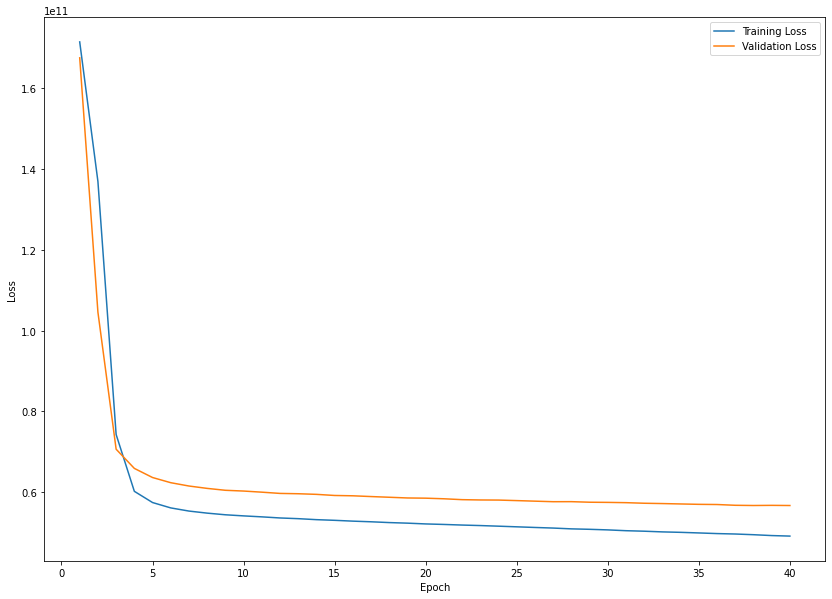

In [548]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [552]:
y_pred = np.squeeze(model.predict(X_test))

pd.DataFrame(data=[list(y_pred[:10]), list(y_test[:10])])

,0,1,2,3,4,5,6,7,8,9
0,300645.625,440466.78125,261732.828125,418414.40625,149951.140625,387793.71875,44084.011719,554698.25,386151.0625,535466.625
1,40000.000,50000.00000,430000.000000,200000.00000,320000.000000,450000.00000,100000.000000,1070000.00,30000.0000,220000.000


In [553]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

224194.86319888846

Even though the results that we got is not the greatest, we still managed to obtain similar results to our first model which had an rmse of 214,447(rounded up)
Some possible reasons for why we couldn't acheive better results could be because:
- We do not have enough data
- Other factors affecting sales (marketing strategies)
- Popularity of the game because of a trend (new aesthetics/ new gameplay)